# Football League: Seria A Season 2021 - 2025

### Serie A is the Italian first division football league. 20 teams compete with each other every Year. 

### Each team plays other 19 teams twice once in their home ground and the other in the opponent's home ground which is an Away match. 

### A new season generally starts in August and ends in May next year. 

## Problem Statement:  We are performing a Exploratory Data Analysis through the eye of a Football Analyst where we will be analyzing these 5 seasons to create a detailed report on which Top 3 Teams have a better chance of winning the league next year, based on: 

### Match statistics
### Winning Rate
### Losing Rate
### We will also pick the best formation
### We will also pick the worst formation
### Which teams have generated the most Revenue in Ticket Sales
### Overall season Analysis including other various factors. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
serieA_data = pd.read_csv('matches_serie_A.csv')

serieA_data.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2024-08-18,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,...,Match Report,NaN,14.0,4.0,17.8,0.0,0,0,2025,Napoli
1,2,2024-08-25,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,...,Match Report,NaN,16.0,5.0,17.5,0.0,0,0,2025,Napoli
2,3,2024-08-31,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,...,Match Report,NaN,29.0,7.0,17.5,1.0,0,0,2025,Napoli
3,4,2024-09-15,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,...,Match Report,NaN,13.0,5.0,16.0,0.0,0,0,2025,Napoli
4,5,2024-09-21,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,...,Match Report,NaN,8.0,1.0,23.4,0.0,0,0,2025,Napoli


In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
serieA_data.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2024-08-18,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,Match Report,NaN,14.0,4.0,17.8,0.0,0,0,2025,Napoli
1,2,2024-08-25,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,Match Report,NaN,16.0,5.0,17.5,0.0,0,0,2025,Napoli
2,3,2024-08-31,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,Match Report,NaN,29.0,7.0,17.5,1.0,0,0,2025,Napoli
3,4,2024-09-15,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,Match Report,NaN,13.0,5.0,16.0,0.0,0,0,2025,Napoli
4,5,2024-09-21,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,Match Report,NaN,8.0,1.0,23.4,0.0,0,0,2025,Napoli


In [5]:
serieA_data['Team'].value_counts()

Team
Hellas Verona     191
Napoli            190
Atalanta          190
Juventus          190
Roma              190
Lazio             190
Milan             190
Bologna           190
Torino            190
Udinese           190
Internazionale    189
Fiorentina        189
Sassuolo          152
Empoli            152
Cagliari          152
Genoa             152
Spezia            115
Lecce             114
Monza             114
Salernitana       114
Sampdoria         114
Parma              76
Venezia            76
Frosinone          38
Como               38
Cremonese          38
Benevento          38
Crotone            38
Name: count, dtype: int64

#### Each Team plays 38 matches in the league every season. There are 5 season in the Dataset. 

#### Every year 3 teams get relegated. 

#### Therefore, 5 Seasons: 38 × 5 = 190 mathces, 4 Seasons: 38 × 4 = 152 matches, 3 Seasons: 38 × 3 = 114 matches and 
#### 2 Seasons: 38 × 2 = 76 matches. This means that:  

**Frosinone**

**Como**

**Cremonese**

**Benevento**

**Crotone**

**These teams only played 1 season in Serie A**

In [6]:
serieA_data.shape

(3800, 29)

In [7]:
serieA_data.isnull().sum()

Unnamed: 0          0
Date                0
Time                0
Comp                0
Round               0
Day                 0
Venue               0
Result              0
GF                  0
GA                  0
Opponent            0
xG                  2
xGA                 2
Poss                0
Attendance        684
Captain             0
Formation           0
Opp Formation       0
Referee             0
Match Report        0
Notes            3798
Sh                  0
SoT                 0
Dist                4
FK                  2
PK                  0
PKatt               0
Season              0
Team                0
dtype: int64

In [8]:
100*serieA_data.isnull().mean()

Unnamed: 0        0.000000
Date              0.000000
Time              0.000000
Comp              0.000000
Round             0.000000
Day               0.000000
Venue             0.000000
Result            0.000000
GF                0.000000
GA                0.000000
Opponent          0.000000
xG                0.052632
xGA               0.052632
Poss              0.000000
Attendance       18.000000
Captain           0.000000
Formation         0.000000
Opp Formation     0.000000
Referee           0.000000
Match Report      0.000000
Notes            99.947368
Sh                0.000000
SoT               0.000000
Dist              0.105263
FK                0.052632
PK                0.000000
PKatt             0.000000
Season            0.000000
Team              0.000000
dtype: float64

In [9]:
serieA_data.describe()

,Unnamed: 0,GF,GA,xG,xGA,Poss,Attendance,Sh,SoT,Dist,FK,PK,PKatt,Season
count,3800.000000,3800.000000,3800.000000,3798.000000,3798.000000,3800.000000,3116.000000,3800.000000,3800.000000,3796.000000,3798.000000,3800.000000,3800.000000,3800.000000
mean,22.378947,1.366316,1.366316,1.296182,1.296182,50.000263,26559.980745,12.453421,3.980789,17.922366,0.444971,0.132632,0.167368,2022.998947
std,13.429295,1.191583,1.191583,0.752087,0.752087,10.345225,19448.772172,5.197235,2.293174,3.106836,0.662395,0.361023,0.405137,1.413655
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,700.000000,0.000000,0.000000,7.300000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,42.000000,12372.000000,9.000000,2.000000,15.900000,0.000000,0.000000,0.000000,2022.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,20707.500000,12.000000,4.000000,17.700000,0.000000,0.000000,0.000000,2023.000000
75%,33.000000,2.000000,2.000000,1.700000,1.700000,58.000000,34844.000000,16.000000,5.000000,19.625000,1.000000,0.000000,0.000000,2024.000000
max,58.000000,8.000000,8.000000,5.400000,5.400000,82.000000,75676.000000,46.000000,16.000000,35.300000,5.000000,3.000000,3.000000,2025.000000


### Data Cleaning and Standardization


**We are elaborating the Date column into Day, Month and Year for better Analysis**

In [10]:
serieA_data["Year"] = pd.DatetimeIndex(serieA_data["Date"]).year

serieA_data["Month"] = pd.DatetimeIndex(serieA_data["Date"]).month

serieA_data["Day_of_month"] = pd.DatetimeIndex(serieA_data["Date"]).day

serieA_data.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month
0,1,2024-08-18,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,Match Report,NaN,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18
1,2,2024-08-25,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,Match Report,NaN,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25
2,3,2024-08-31,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,Match Report,NaN,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31
3,4,2024-09-15,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,Match Report,NaN,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15
4,5,2024-09-21,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,Match Report,NaN,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21


### We are dropping the columns: 

#### 'Unnamed: 0': Since we will already have pre-determined Index 

#### 'Match Report': Only has one  value amd adds no input in Analysis  

#### 'Notes': Is related to Match report and 99.9% of Null values, therefore, we are dropping 

#### 'Date': date column has no need since we have already bifurcated it into 3 different columns better analytical insights. 

In [11]:
serieA_data = serieA_data.drop(['Unnamed: 0', 'Date', 'Match Report', 'Notes'], axis = 1)

serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21


#### Let us check which team has the highest HOME Attendance

In [12]:
## Slicing the data to fetch out only HOME attendance

total_attendance = serieA_data[(serieA_data['Venue'] == 'Home')]

total_attendance.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31
5,20:45,Serie A,Matchweek 6,Sun,Home,W,2,0,Monza,1.1,0.3,49.0,50000.0,Giovanni Di Lorenzo,4-3-3,3-4-3,Gianluca Manganiello,11.0,2.0,13.8,0.0,0,0,2025,Napoli,2024,9,29
6,18:30,Serie A,Matchweek 7,Fri,Home,W,3,1,Como,1.9,0.4,41.0,50000.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Ermanno Feliciani,8.0,5.0,18.1,0.0,1,1,2025,Napoli,2024,10,4
8,15:00,Serie A,Matchweek 9,Sat,Home,W,1,0,Lecce,2.7,0.7,64.0,51103.0,Giovanni Di Lorenzo,4-3-3,4-5-1,Paride Tremolada,24.0,8.0,14.8,0.0,0,0,2025,Napoli,2024,10,26


In [13]:
df_sliced = total_attendance[['Attendance', 'Team']]

df_sliced.head()

,Attendance,Team
1,45000.0,Napoli
2,50000.0,Napoli
5,50000.0,Napoli
6,50000.0,Napoli
8,51103.0,Napoli


In [14]:
## Grouping the data By Teams

home_attendance = df_sliced.groupby(by = ['Team']).sum(numeric_only=True)

home_attendance

,Attendance
Team,
Atalanta,1257683.0
Benevento,3000.0
Bologna,1715005.0
Cagliari,799183.0
Como,201472.0
Cremonese,227588.0
Crotone,1000.0
Empoli,720193.0
Fiorentina,1948169.0


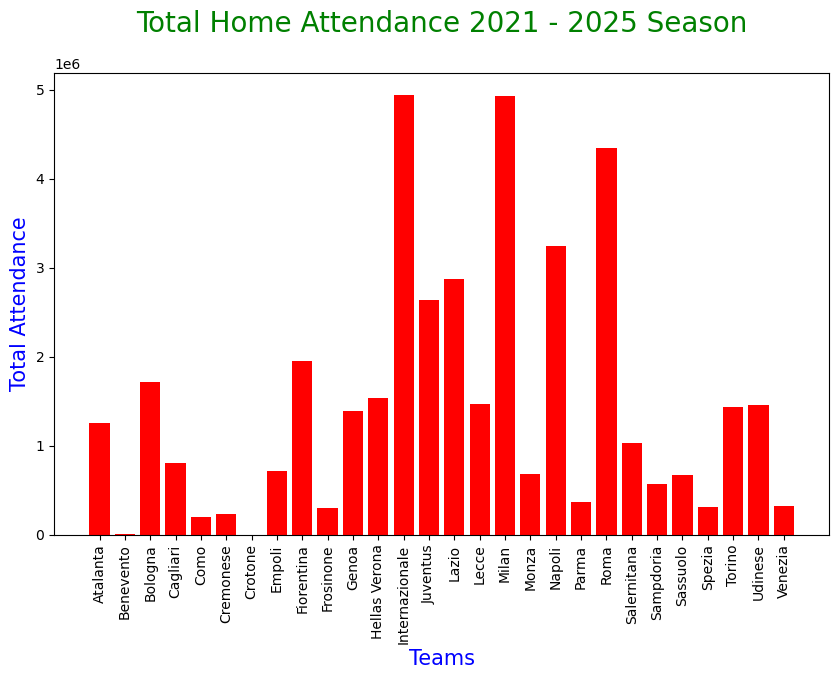

In [15]:
## We can also choose figure size.
plt.figure(figsize=(10, 6))

plt.bar(x=home_attendance.index, height=home_attendance['Attendance'], align = 'center', color = 'Red')

## Adding Title: \n this is a break line. 
plt.title("Total Home Attendance 2021 - 2025 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Total Attendance", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


plt.show()

#### We can see that Internazionale, Milan and Roma are the 3 teams with the highest home Attendance


#### Let us find which Referee has officiated the most Number of Matches

In [16]:
serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21


In [17]:
serieA_data['Referee'].value_counts()

Referee
Daniele Doveri                164
Davide Massa                  160
Maurizio Mariani              160
Daniele Chiffi                146
Marco Di Bello                142
Michael Fabbri                138
Fabio Maresca                 136
Luca Pairetto                 134
Daniele Orsato                124
Livio Marinelli               118
Simone Sozza                  116
Marco Piccinini               116
Gianluca Manganiello          114
Antonio Rapuano               112
Rosario Abisso                110
Marco Guida                   108
Giovanni Ayroldi               98
Juan Sacchi                    94
Andrea Colombo                 94
Federico La Penna              92
Francesco Fourneau             92
Matteo Marchetti               88
Antonio Giua                   78
Gianluca Aureliano             76
Matteo Marcenaro               70
Luca Massimi                   70
Federico Dionisi               68
Paolo Valeri                   64
Massimiliano Irrati            64
Alessa

#### We can see that Daniele Doveri, Davide Massa, Maurizio Mariani, Daniele Chiffi and Marco Di Bello are the Top 5 Referees who have officiated the most number of Matches

In [18]:
serieA_data.head(3)

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31


### Now let us Add two new columns: 

#### Conversion Rate: Which is the Number of Goals Scored 'GF' over the Number of Shots 'Sh' × 100

#### Shot Accuracy Rate: Number of Shots on Target 'SoT' × 100 over Number of Shots taken 'Sh'

#### This will help us determine which teams are better in finishing Chances and have better Goal Scorers

In [19]:
cr = round(100*((serieA_data["GF"])/(serieA_data["Sh"])), 1)

print(cr)

0        0.0
1       18.8
2        6.9
3       30.8
4        0.0
        ... 
3795     0.0
3796    28.6
3797     0.0
3798     6.2
3799     0.0
Length: 3800, dtype: float64


In [20]:
serieA_data["Conversion_Rate"] = cr

serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0


In [21]:
sar = round(100*((serieA_data["SoT"])/(serieA_data["Sh"])), 1)

print(sar)

0       28.6
1       31.2
2       24.1
3       38.5
4       12.5
        ... 
3795    10.0
3796    28.6
3797    33.3
3798    50.0
3799     8.3
Length: 3800, dtype: float64


In [22]:
serieA_data["Shot_Accuracy_Rate"] = sar

serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5


In [23]:
## Slicing the data to fetch out only Season: 2025

a = serieA_data[(serieA_data['Season'] == 2025)]

a.head(100)

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5
5,20:45,Serie A,Matchweek 6,Sun,Home,W,2,0,Monza,1.1,0.3,49.0,50000.0,Giovanni Di Lorenzo,4-3-3,3-4-3,Gianluca Manganiello,11.0,2.0,13.8,0.0,0,0,2025,Napoli,2024,9,29,18.2,18.2
6,18:30,Serie A,Matchweek 7,Fri,Home,W,3,1,Como,1.9,0.4,41.0,50000.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Ermanno Feliciani,8.0,5.0,18.1,0.0,1,1,2025,Napoli,2024,10,4,37.5,62.5
7,12:30,Serie A,Matchweek 8,Sun,Away,W,1,0,Empoli,1.3,0.7,50.0,12000.0,Giovanni Di Lorenzo,4-3-3,3-1-4-2,Rosario Abisso,8.0,0.0,16.7,0.0,1,1,2025,Napoli,2024,10,20,12.5,0.0
8,15:00,Serie A,Matchweek 9,Sat,Home,W,1,0,Lecce,2.7,0.7,64.0,51103.0,Giovanni Di Lorenzo,4-3-3,4-5-1,Paride Tremolada,24.0,8.0,14.8,0.0,0,0,2025,Napoli,2024,10,26,4.2,33.3
9,20:45,Serie A,Matchweek 10,Tue,Away,W,2,0,Milan,1.1,0.7,39.0,73507.0,Giovanni Di Lorenzo,4-3-3,4-3-3,Andrea Colombo,9.0,4.0,17.9,0.0,0,0,2025,Napoli,2024,10,29,22.2,44.4


In [24]:
df1_sliced = a[['Team', 'GF', 'Sh', 'SoT', 'Conversion_Rate', 'Shot_Accuracy_Rate']]

df1_sliced.head()

,Team,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
0,Napoli,0,14.0,4.0,0.0,28.6
1,Napoli,3,16.0,5.0,18.8,31.2
2,Napoli,2,29.0,7.0,6.9,24.1
3,Napoli,4,13.0,5.0,30.8,38.5
4,Napoli,0,8.0,1.0,0.0,12.5


In [25]:
team_data_2025 = df1_sliced.groupby(by = ['Team']).mean(numeric_only=True)

team_data_2025

,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
Team,,,,,
Atalanta,2.052632,14.157895,4.763158,15.723684,34.402632
Bologna,1.500000,13.289474,4.368421,11.528947,34.139474
Cagliari,1.052632,11.078947,3.026316,10.128947,27.186842
Como,1.289474,13.657895,4.631579,9.857895,33.821053
Empoli,0.868421,9.657895,2.815789,10.189474,29.802632
Fiorentina,1.540541,11.594595,4.324324,14.359459,38.110811
Genoa,0.973684,10.078947,3.078947,10.081579,30.068421
Hellas Verona,0.894737,9.789474,2.500000,11.068421,27.202632
Internazionale,2.135135,14.972973,4.783784,15.716216,32.489189


In [26]:
## Slicing the data to fetch out only Season: 2024

b = serieA_data[(serieA_data['Season'] == 2024)]

b.head(60)

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
758,20:45,Serie A,Matchweek 1,Sat,Home,W,2,0,Monza,2.7,0.8,47.0,72509.0,Lautaro Martínez,3-5-2,3-5-2,Andrea Colombo,22.0,3.0,17.2,1.0,0,0,2024,Internazionale,2023,8,19,9.1,13.6
759,20:45,Serie A,Matchweek 2,Mon,Away,W,2,0,Cagliari,0.9,0.6,67.0,16412.0,Lautaro Martínez,3-5-2,4-2-3-1,Michael Fabbri,17.0,3.0,15.9,0.0,0,0,2024,Internazionale,2023,8,28,11.8,17.6
760,18:30,Serie A,Matchweek 3,Sun,Home,W,4,0,Fiorentina,3.7,0.4,40.0,72739.0,Lautaro Martínez,3-5-2,4-2-3-1,Matteo Marchetti,20.0,10.0,14.5,1.0,1,1,2024,Internazionale,2023,9,3,20.0,50.0
761,18:00,Serie A,Matchweek 4,Sat,Home,W,5,1,Milan,2.6,1.1,41.0,75571.0,Lautaro Martínez,3-5-2,4-3-3,Simone Sozza,13.0,6.0,15.2,1.0,1,1,2024,Internazionale,2023,9,16,38.5,46.2
762,12:30,Serie A,Matchweek 5,Sun,Away,W,1,0,Empoli,1.6,0.3,61.0,15651.0,Lautaro Martínez,3-5-2,4-3-2-1,Matteo Marcenaro,23.0,5.0,16.8,0.0,0,0,2024,Internazionale,2023,9,24,4.3,21.7
763,20:45,Serie A,Matchweek 6,Wed,Home,L,1,2,Sassuolo,0.9,1.0,63.0,70864.0,Lautaro Martínez,3-5-2,4-2-3-1,Luca Massimi,13.0,3.0,15.2,0.0,0,0,2024,Internazionale,2023,9,27,7.7,23.1
764,20:45,Serie A,Matchweek 7,Sat,Away,W,4,0,Salernitana,2.3,0.6,64.0,28085.0,Nicolò Barella,3-5-2,3-4-3,Rosario Abisso,15.0,5.0,16.8,1.0,1,1,2024,Internazionale,2023,9,30,26.7,33.3
765,15:00,Serie A,Matchweek 8,Sat,Home,D,2,2,Bologna,0.7,1.3,63.0,74072.0,Lautaro Martínez,3-5-2,4-2-3-1,Marco Guida,14.0,5.0,18.3,1.0,0,0,2024,Internazionale,2023,10,7,14.3,35.7
766,18:00,Serie A,Matchweek 9,Sat,Away,W,3,0,Torino,2.5,0.4,53.0,26193.0,Lautaro Martínez,3-5-2,3-4-3,Matteo Marchetti,13.0,3.0,17.1,1.0,1,1,2024,Internazionale,2023,10,21,23.1,23.1
767,18:00,Serie A,Matchweek 10,Sun,Home,W,1,0,Roma,2.2,0.1,63.0,75573.0,Lautaro Martínez,3-5-2,3-5-2,Fabio Maresca,19.0,3.0,16.0,0.0,0,0,2024,Internazionale,2023,10,29,5.3,15.8


In [27]:
df2_sliced = b[['Team', 'GF', 'Sh', 'SoT', 'Conversion_Rate', 'Shot_Accuracy_Rate']]

df2_sliced.head()

,Team,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
758,Internazionale,2,22.0,3.0,9.1,13.6
759,Internazionale,2,17.0,3.0,11.8,17.6
760,Internazionale,4,20.0,10.0,20.0,50.0
761,Internazionale,5,13.0,6.0,38.5,46.2
762,Internazionale,1,23.0,5.0,4.3,21.7


In [28]:
team_data_2024 = df2_sliced.groupby(by = ['Team']).mean(numeric_only=True)

team_data_2024

,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
Team,,,,,
Atalanta,1.894737,14.184211,5.184211,13.365789,35.889474
Bologna,1.421053,12.421053,4.184211,11.847368,33.960526
Cagliari,1.105263,11.631579,3.342105,10.184211,29.263158
Empoli,0.763158,10.868421,2.947368,9.350000,27.665789
Fiorentina,1.605263,13.552632,4.500000,13.200000,34.252632
Frosinone,1.157895,12.105263,3.868421,11.294737,31.944737
Genoa,1.184211,10.447368,3.131579,14.178947,33.463158
Hellas Verona,1.000000,11.447368,3.842105,9.036842,32.881579
Internazionale,2.342105,15.263158,5.157895,16.576316,35.878947


In [29]:
## Slicing the data to fetch out only Season: 2023

c = serieA_data[(serieA_data['Season'] == 2023)]

c.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
1518,18:30,Serie A,Matchweek 1,Mon,Away,W,5,2,Hellas Verona,2.4,1.1,66.0,16967.0,Giovanni Di Lorenzo,4-3-3,3-5-2,Michael Fabbri,25.0,8.0,15.2,0.0,0,0,2023,Napoli,2022,8,15,20.0,32.0
1519,18:30,Serie A,Matchweek 2,Sun,Home,W,4,0,Monza,2.0,0.1,54.0,36559.0,Giovanni Di Lorenzo,4-3-3,3-5-2,Francesco Fourneau,22.0,5.0,15.3,1.0,0,0,2023,Napoli,2022,8,21,18.2,22.7
1520,20:45,Serie A,Matchweek 3,Sun,Away,D,0,0,Fiorentina,1.7,0.5,52.0,32286.0,Giovanni Di Lorenzo,4-2-3-1,4-3-3,Livio Marinelli,13.0,2.0,14.7,1.0,0,0,2023,Napoli,2022,8,28,0.0,15.4
1521,20:45,Serie A,Matchweek 4,Wed,Home,D,1,1,Lecce,1.7,1.1,71.0,37573.0,Giovanni Di Lorenzo,4-2-3-1,4-1-4-1,Matteo Marcenaro,19.0,7.0,17.7,0.0,0,0,2023,Napoli,2022,8,31,5.3,36.8
1522,20:45,Serie A,Matchweek 5,Sat,Away,W,2,1,Lazio,2.1,0.3,61.0,39000.0,Giovanni Di Lorenzo,4-2-3-1,4-3-3,Simone Sozza,19.0,7.0,16.1,0.0,0,0,2023,Napoli,2022,9,3,10.5,36.8


In [30]:
df3_sliced = c[['Team', 'GF', 'Sh', 'SoT', 'Conversion_Rate', 'Shot_Accuracy_Rate']]

df3_sliced.head()

,Team,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
1518,Napoli,5,25.0,8.0,20.0,32.0
1519,Napoli,4,22.0,5.0,18.2,22.7
1520,Napoli,0,13.0,2.0,0.0,15.4
1521,Napoli,1,19.0,7.0,5.3,36.8
1522,Napoli,2,19.0,7.0,10.5,36.8


In [31]:
team_data_2023 = df3_sliced.groupby(by = ['Team']).mean(numeric_only=True)

team_data_2023

,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
Team,,,,,
Atalanta,1.736842,13.315789,4.421053,13.986842,33.273684
Bologna,1.394737,12.605263,3.947368,11.789474,31.607895
Cremonese,0.947368,12.052632,3.210526,8.850000,28.013158
Empoli,0.973684,11.763158,3.394737,9.268421,30.813158
Fiorentina,1.394737,15.710526,4.500000,10.050000,30.215789
Hellas Verona,0.871795,10.871795,3.102564,8.692308,29.015385
Internazionale,1.868421,16.447368,5.184211,13.242105,31.586842
Juventus,1.473684,13.921053,4.500000,10.944737,33.160526
Lazio,1.578947,11.315789,4.236842,14.242105,37.818421


In [32]:
## Slicing the data to fetch out only Season: 2022

d = serieA_data[(serieA_data['Season'] == 2022)]

d.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
2280,20:45,Serie A,Matchweek 1,Mon,Away,W,1,0,Sampdoria,0.9,1.1,50.0,5000.0,Davide Calabria,4-2-3-1,4-4-2,Marco Guida,11.0,4.0,19.7,0.0,0,0,2022,Milan,2021,8,23,9.1,36.4
2281,20:45,Serie A,Matchweek 2,Sun,Home,W,4,1,Cagliari,2.7,0.6,57.0,31946.0,Davide Calabria,4-2-3-1,3-5-2,Marco Serra,17.0,4.0,19.0,1.0,1,1,2022,Milan,2021,8,29,23.5,23.5
2282,18:00,Serie A,Matchweek 3,Sun,Home,W,2,0,Lazio,2.9,0.3,47.0,36207.0,Alessio Romagnoli,4-2-3-1,4-3-3,Daniele Chiffi,18.0,3.0,20.0,0.0,0,1,2022,Milan,2021,9,12,11.1,16.7
2283,20:45,Serie A,Matchweek 4,Sun,Away,D,1,1,Juventus,0.8,1.3,56.0,18785.0,Alessio Romagnoli,4-2-3-1,4-4-2,Daniele Doveri,13.0,3.0,23.0,1.0,0,0,2022,Milan,2021,9,19,7.7,23.1
2284,20:45,Serie A,Matchweek 5,Wed,Home,W,2,0,Venezia,1.6,0.8,66.0,26185.0,Alessio Romagnoli,4-2-3-1,4-3-3,Ivan Pezzuto,14.0,4.0,17.6,2.0,0,0,2022,Milan,2021,9,22,14.3,28.6


In [33]:
df4_sliced = d[['Team', 'GF', 'Sh', 'SoT', 'Conversion_Rate', 'Shot_Accuracy_Rate']]

df4_sliced.head()

,Team,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
2280,Milan,1,11.0,4.0,9.1,36.4
2281,Milan,4,17.0,4.0,23.5,23.5
2282,Milan,2,18.0,3.0,11.1,16.7
2283,Milan,1,13.0,3.0,7.7,23.1
2284,Milan,2,14.0,4.0,14.3,28.6


In [34]:
team_data_2022 = df4_sliced.groupby(by = ['Team']).mean(numeric_only=True)

team_data_2022

,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
Team,,,,,
Atalanta,1.710526,15.736842,4.394737,10.847368,28.581579
Bologna,1.157895,11.421053,3.763158,10.960526,32.807895
Cagliari,0.894737,11.052632,3.078947,8.968421,29.121053
Empoli,1.315789,12.894737,3.973684,11.105263,31.202632
Fiorentina,1.552632,13.184211,4.526316,13.102632,33.200000
Genoa,0.710526,10.447368,2.789474,7.437838,28.318919
Hellas Verona,1.710526,11.973684,4.000000,18.600000,36.605263
Internazionale,2.210526,17.552632,6.289474,13.626316,35.055263
Juventus,1.500000,13.605263,4.368421,13.278947,32.673684


In [35]:
## Slicing the data to fetch out only Season: 2021

e = serieA_data[(serieA_data['Season'] == 2021)]

e.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
3040,20:45,Serie A,Matchweek 2,Sat,Home,W,4,3,Fiorentina,2.3,2.4,67.0,1000.0,Samir Handanović,3-4-1-2,3-5-2,Giampaolo Calvarese,21.0,8.0,18.3,0.0,0,0,2021,Internazionale,2020,9,26,19.0,38.1
3041,18:00,Serie A,Matchweek 1,Wed,Away,W,5,2,Benevento,3.6,1.5,66.0,1000.0,Samir Handanović,3-4-1-2,4-3-3,Marco Piccinini,18.0,8.0,15.5,1.0,0,0,2021,Internazionale,2020,9,30,27.8,44.4
3042,15:00,Serie A,Matchweek 3,Sun,Away,D,1,1,Lazio,0.6,1.2,60.0,1000.0,Samir Handanović,3-4-1-2,3-5-2,Marco Guida,12.0,3.0,16.9,0.0,0,0,2021,Internazionale,2020,10,4,8.3,25.0
3043,18:00,Serie A,Matchweek 4,Sat,Home,L,1,2,Milan,2.8,2.1,55.0,1000.0,Samir Handanović,3-1-4-2,4-2-3-1,Maurizio Mariani,18.0,5.0,13.7,0.0,0,0,2021,Internazionale,2020,10,17,5.6,27.8
3044,18:00,Serie A,Matchweek 5,Sat,Away,W,2,0,Genoa,1.7,0.0,60.0,1000.0,Samir Handanović,3-4-1-2,3-5-2,Davide Massa,14.0,4.0,15.5,0.0,0,0,2021,Internazionale,2020,10,24,14.3,28.6


In [36]:
df5_sliced = e[['Team', 'GF', 'Sh', 'SoT', 'Conversion_Rate', 'Shot_Accuracy_Rate']]

df5_sliced.head()

,Team,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
3040,Internazionale,4,21.0,8.0,19.0,38.1
3041,Internazionale,5,18.0,8.0,27.8,44.4
3042,Internazionale,1,12.0,3.0,8.3,25.0
3043,Internazionale,1,18.0,5.0,5.6,27.8
3044,Internazionale,2,14.0,4.0,14.3,28.6


In [37]:
team_data_2021 = df5_sliced.groupby(by = ['Team']).mean(numeric_only=True)

team_data_2021

,GF,Sh,SoT,Conversion_Rate,Shot_Accuracy_Rate
Team,,,,,
Atalanta,2.368421,16.157895,5.815789,14.705263,36.086842
Benevento,1.052632,10.815789,3.368421,11.048649,33.818919
Bologna,1.342105,13.026316,4.605263,11.221053,36.010526
Cagliari,1.131579,11.289474,3.210526,10.065789,28.471053
Crotone,1.184211,9.289474,2.921053,13.500000,32.263158
Fiorentina,1.236842,9.631579,3.026316,14.539474,33.010526
Genoa,1.236842,8.894737,3.157895,14.210526,37.060526
Hellas Verona,1.210526,10.526316,3.105263,12.805263,29.552632
Internazionale,2.342105,14.289474,5.105263,17.776316,35.071053


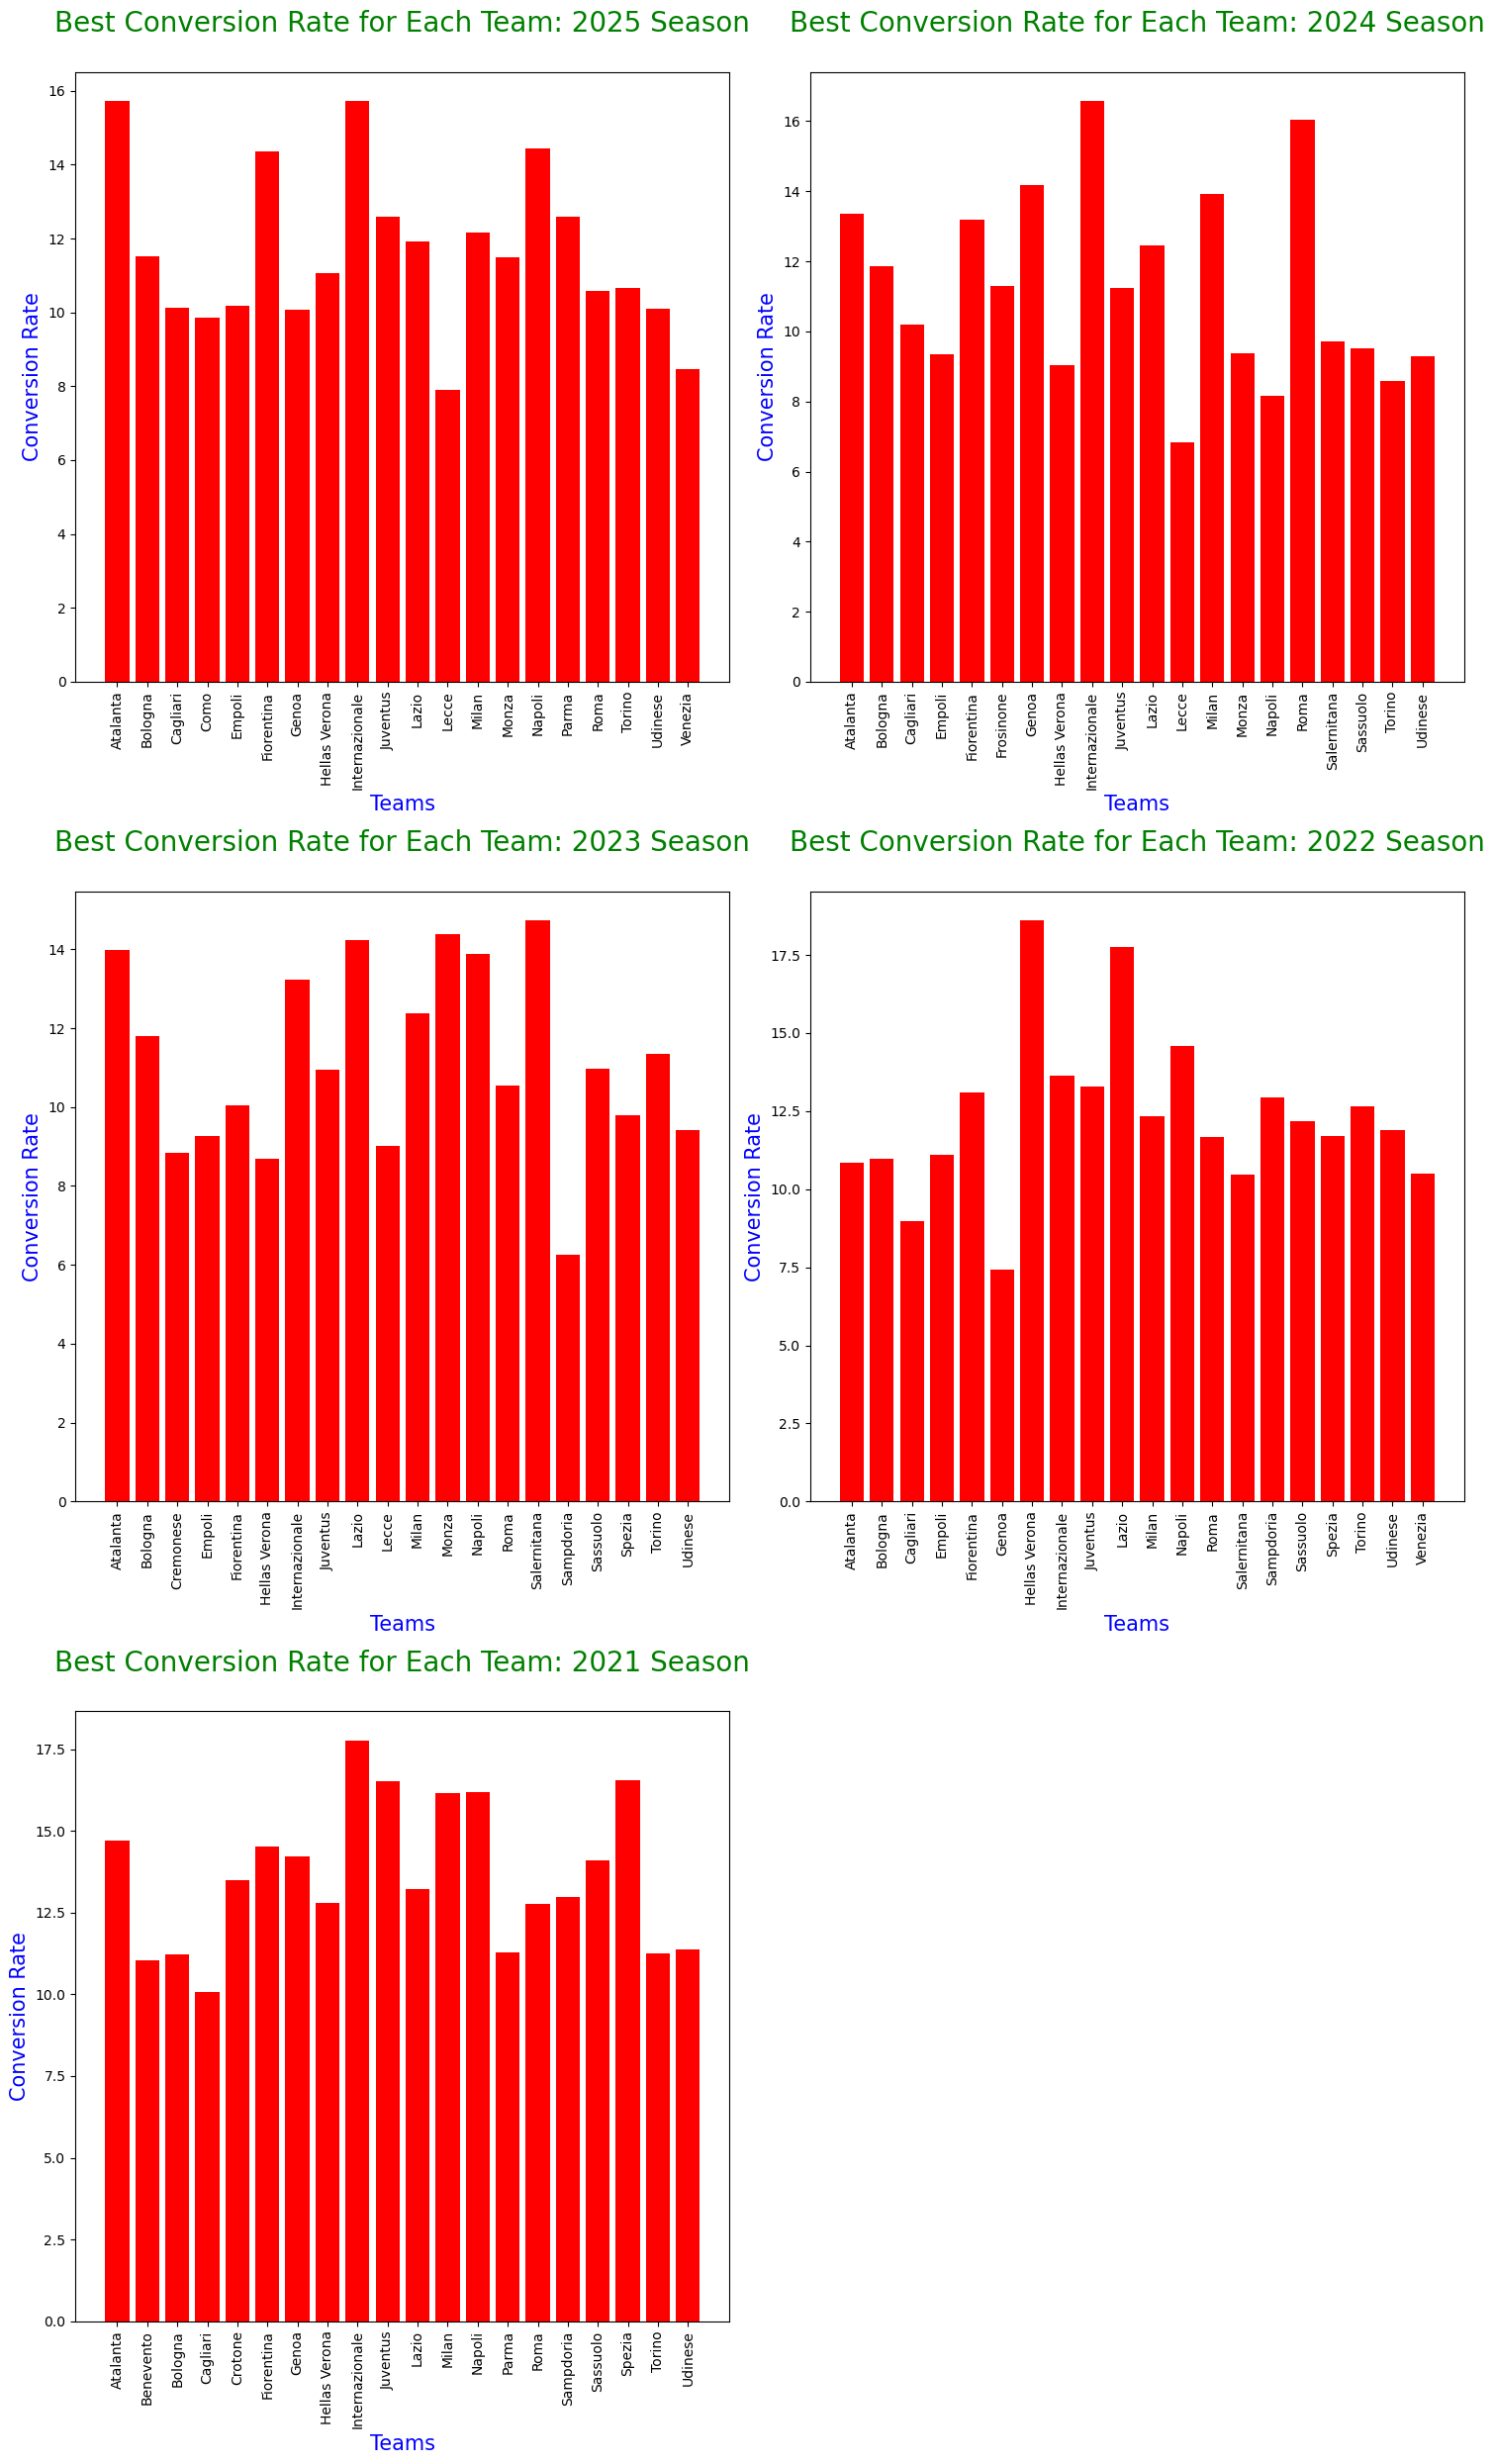

In [69]:
plt.figure(figsize = [15,25])
plt.subplot(3,2,1)

plt.bar(x = team_data_2025.index, height = team_data_2025['Conversion_Rate'], align = 'center', color = 'Red')

## Adding Title: \n this is a break line. 
plt.title("Best Conversion Rate for Each Team: 2025 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Conversion Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


plt.subplot(3,2,2)

plt.bar(x = team_data_2024.index, height = team_data_2024['Conversion_Rate'], align = 'center', color = 'Red')

## Adding Title: \n this is a break line. 
plt.title("Best Conversion Rate for Each Team: 2024 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Conversion Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


plt.subplot(3,2,3)

plt.bar(x = team_data_2023.index, height = team_data_2023['Conversion_Rate'], align = 'center', color = 'Red')

## Adding Title: \n this is a break line. 
plt.title("Best Conversion Rate for Each Team: 2023 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Conversion Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.subplot(3,2,4)

plt.bar(x = team_data_2022.index, height = team_data_2022['Conversion_Rate'], align = 'center', color = 'Red')

## Adding Title: \n this is a break line. 
plt.title("Best Conversion Rate for Each Team: 2022 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Conversion Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.subplot(3,2,5)

plt.bar(x = team_data_2021.index, height = team_data_2021['Conversion_Rate'], align = 'center', color = 'Red')

## Adding Title: \n this is a break line. 
plt.title("Best Conversion Rate for Each Team: 2021 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Conversion Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Here we can see that Atalanta, Inter and Napoli have the best Conversion Rate in Season 2025

### Here we can see that Inter, Roma and Genoa have the best Conversion Rate in Season 2024

### Here we can see that Salernitana, Lazio and Atalanta have the best Conversion Rate in Season 2023

### Here we can see that Hellas Verona, Lazio and Napoli have the best Conversion Rate in Season 2022

### Here we can see that Inter, Juventus and Spezia have the best Conversion Rate in Season 2021


## Now let us also visualise the Shot Accuracy Rate

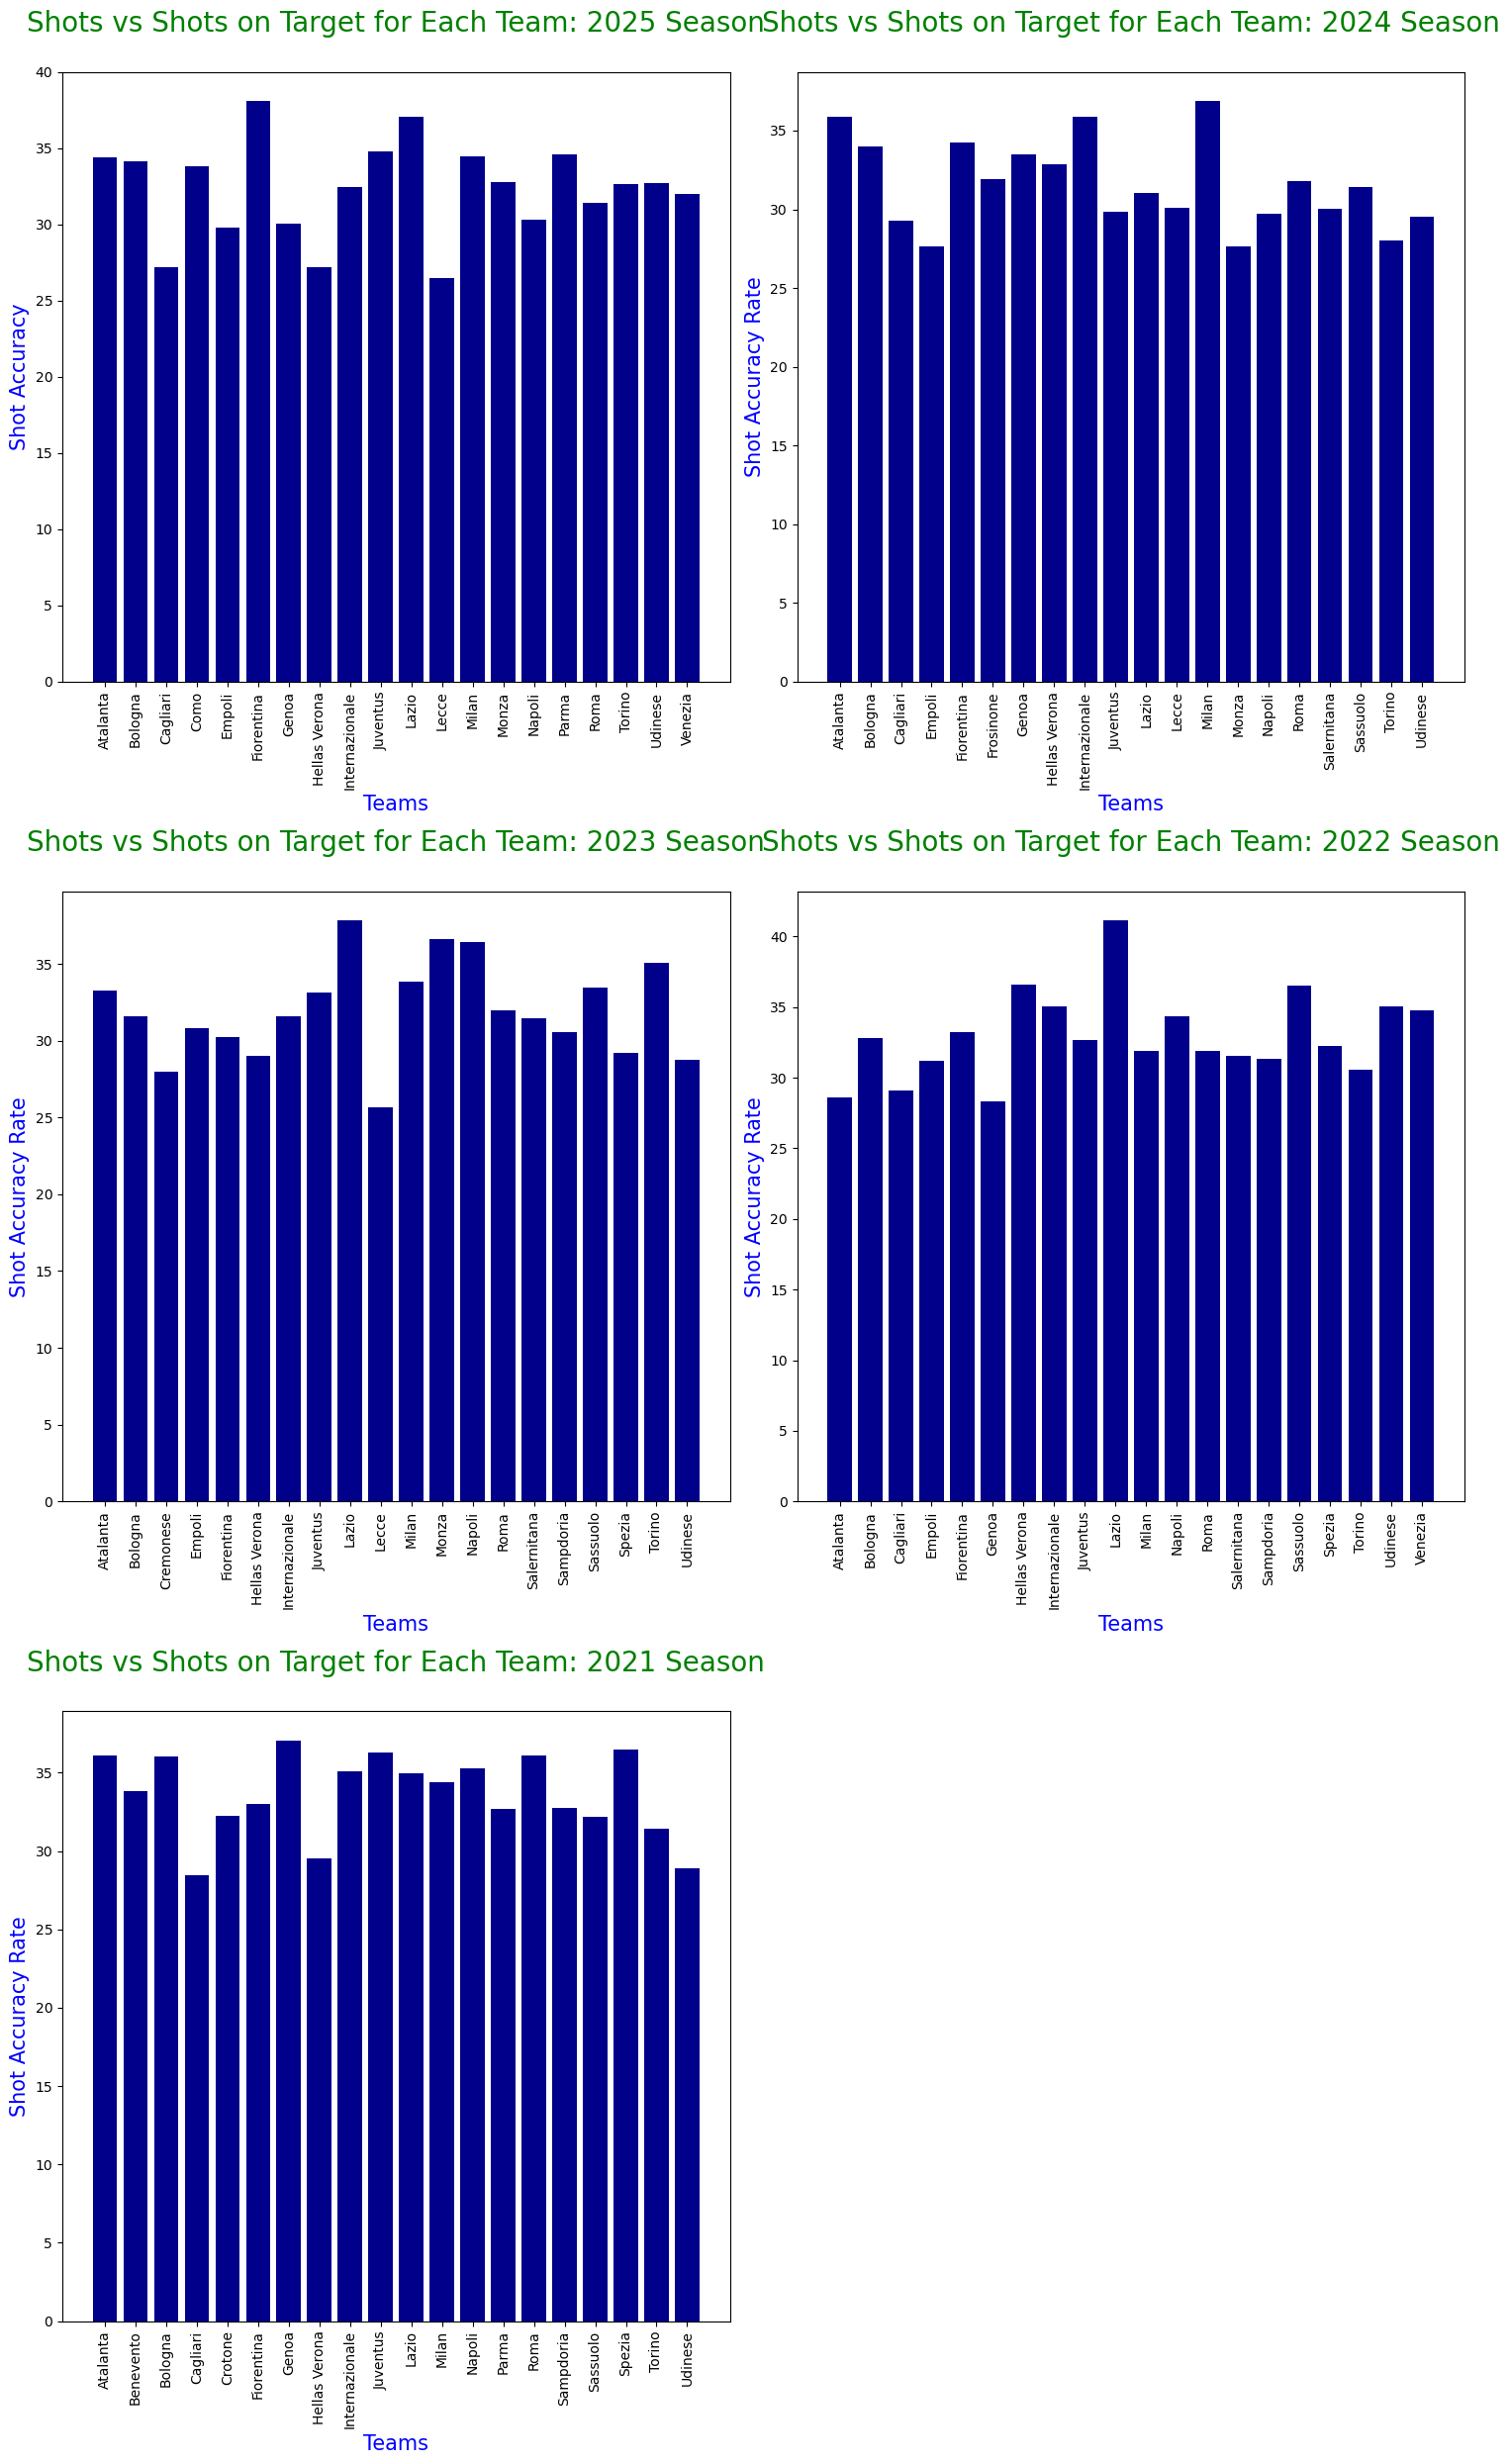

In [68]:
plt.figure(figsize = [15,25])
plt.subplot(3,2,1)

plt.bar(x = team_data_2025.index, height = team_data_2025['Shot_Accuracy_Rate'], align = 'center', color = 'darkblue')

## Adding Title: \n this is a break line. 
plt.title("Shots vs Shots on Target for Each Team: 2025 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Shot Accuracy", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


plt.subplot(3,2,2)

plt.bar(x = team_data_2024.index, height = team_data_2024['Shot_Accuracy_Rate'], align = 'center', color = 'darkblue')

## Adding Title: \n this is a break line. 
plt.title("Shots vs Shots on Target for Each Team: 2024 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Shot Accuracy Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


plt.subplot(3,2,3)

plt.bar(x = team_data_2023.index, height = team_data_2023['Shot_Accuracy_Rate'], align = 'center', color = 'darkblue')

## Adding Title: \n this is a break line. 
plt.title("Shots vs Shots on Target for Each Team: 2023 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Shot Accuracy Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.subplot(3,2,4)

plt.bar(x = team_data_2022.index, height = team_data_2022['Shot_Accuracy_Rate'], align = 'center', color = 'darkblue')

## Adding Title: \n this is a break line. 
plt.title("Shots vs Shots on Target for Each Team: 2022 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Shot Accuracy Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.subplot(3,2,5)

plt.bar(x = team_data_2021.index, height = team_data_2021['Shot_Accuracy_Rate'], align = 'center', color = 'darkblue')

## Adding Title: \n this is a break line. 
plt.title("Shots vs Shots on Target for Each Team: 2021 Season\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Shot Accuracy Rate", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Here we can see that Fiorentina, Lazio and Milan have the best Shot Accuracy in Season 2025

### Here we can see that MIlan,  Atalanta and Inter have the best Shot Accuracy in Season 2024

### Here we can see that Lazio, Monza and Napoli have the best Shot Accuracy in Season 2023

### Here we can see that Lazio, Hellas Verona and Sassuolo have the best Shot Accuracy in Season 2022

### Here we can see that Genoa, Spezia and Juventus have the best Shot Accuracy in Season 2021

In [40]:
serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5


In [41]:
e = serieA_data['xG'] 
f = serieA_data['GF']

c = e - f

print(c)

0       1.0
1      -0.5
2       0.2
3      -2.1
4       0.3
       ... 
3795    0.5
3796   -1.1
3797    0.7
3798    0.0
3799    0.8
Length: 3800, dtype: float64


In [42]:
serieA_data['Performance'] = c

serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6,1.0
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2,-0.5
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1,0.2
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5,-2.1
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5,0.3


In [43]:
for p in serieA_data["Performance"]:
    if p > 0:
        print("Underperformed")
    elif p == 0:
        print("Expected Performance")
    else:
        print("Overperformed")

Underperformed
Overperformed
Underperformed
Overperformed
Underperformed
Overperformed
Overperformed
Underperformed
Underperformed
Overperformed
Underperformed
Overperformed
Underperformed
Underperformed
Underperformed
Overperformed
Overperformed
Underperformed
Overperformed
Overperformed
Overperformed
Underperformed
Overperformed
Underperformed
Overperformed
Underperformed
Underperformed
Underperformed
Underperformed
Overperformed
Underperformed
Overperformed
Underperformed
Overperformed
Overperformed
Overperformed
Underperformed
Underperformed
Overperformed
Underperformed
Overperformed
Underperformed
Overperformed
Overperformed
Overperformed
Expected Performance
Overperformed
Overperformed
Underperformed
Underperformed
Overperformed
Overperformed
Overperformed
Overperformed
Underperformed
Underperformed
Overperformed
Overperformed
Overperformed
Underperformed
Underperformed
Underperformed
Underperformed
Overperformed
Overperformed
Underperformed
Overperformed
Expected Performance
Ove

In [44]:
serieA_data['Performance_Infront_of_Goal'] = [
    "Underperformed" if p > 0 else "Expected Performance" if p == 0 else "Overperformed"
    for p in serieA_data["Performance"]
]

serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance,Performance_Infront_of_Goal
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6,1.0,Underperformed
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2,-0.5,Overperformed
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1,0.2,Underperformed
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5,-2.1,Overperformed
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5,0.3,Underperformed


In [45]:
f = serieA_data[(serieA_data['Performance_Infront_of_Goal'] == 'Underperformed')]

f.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance,Performance_Infront_of_Goal
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6,1.0,Underperformed
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1,0.2,Underperformed
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5,0.3,Underperformed
7,12:30,Serie A,Matchweek 8,Sun,Away,W,1,0,Empoli,1.3,0.7,50.0,12000.0,Giovanni Di Lorenzo,4-3-3,3-1-4-2,Rosario Abisso,8.0,0.0,16.7,0.0,1,1,2025,Napoli,2024,10,20,12.5,0.0,0.3,Underperformed
8,15:00,Serie A,Matchweek 9,Sat,Home,W,1,0,Lecce,2.7,0.7,64.0,51103.0,Giovanni Di Lorenzo,4-3-3,4-5-1,Paride Tremolada,24.0,8.0,14.8,0.0,0,0,2025,Napoli,2024,10,26,4.2,33.3,1.7,Underperformed


In [46]:
df6_sliced = f[['Season', 'Team', 'Performance_Infront_of_Goal']]

df6_sliced.head()

,Season,Team,Performance_Infront_of_Goal
0,2025,Napoli,Underperformed
2,2025,Napoli,Underperformed
4,2025,Napoli,Underperformed
7,2025,Napoli,Underperformed
8,2025,Napoli,Underperformed


In [47]:
underperformed_metric = df6_sliced.groupby(by = ['Season', 'Team']).count()

underperformed_metric_a = underperformed_metric.reset_index()

underperformed_metric_a

,Season,Team,Performance_Infront_of_Goal
0,2021,Atalanta,11
1,2021,Benevento,16
2,2021,Bologna,22
3,2021,Cagliari,20
4,2021,Crotone,19
5,2021,Fiorentina,22
6,2021,Genoa,18
7,2021,Hellas Verona,18
8,2021,Internazionale,12
9,2021,Juventus,17


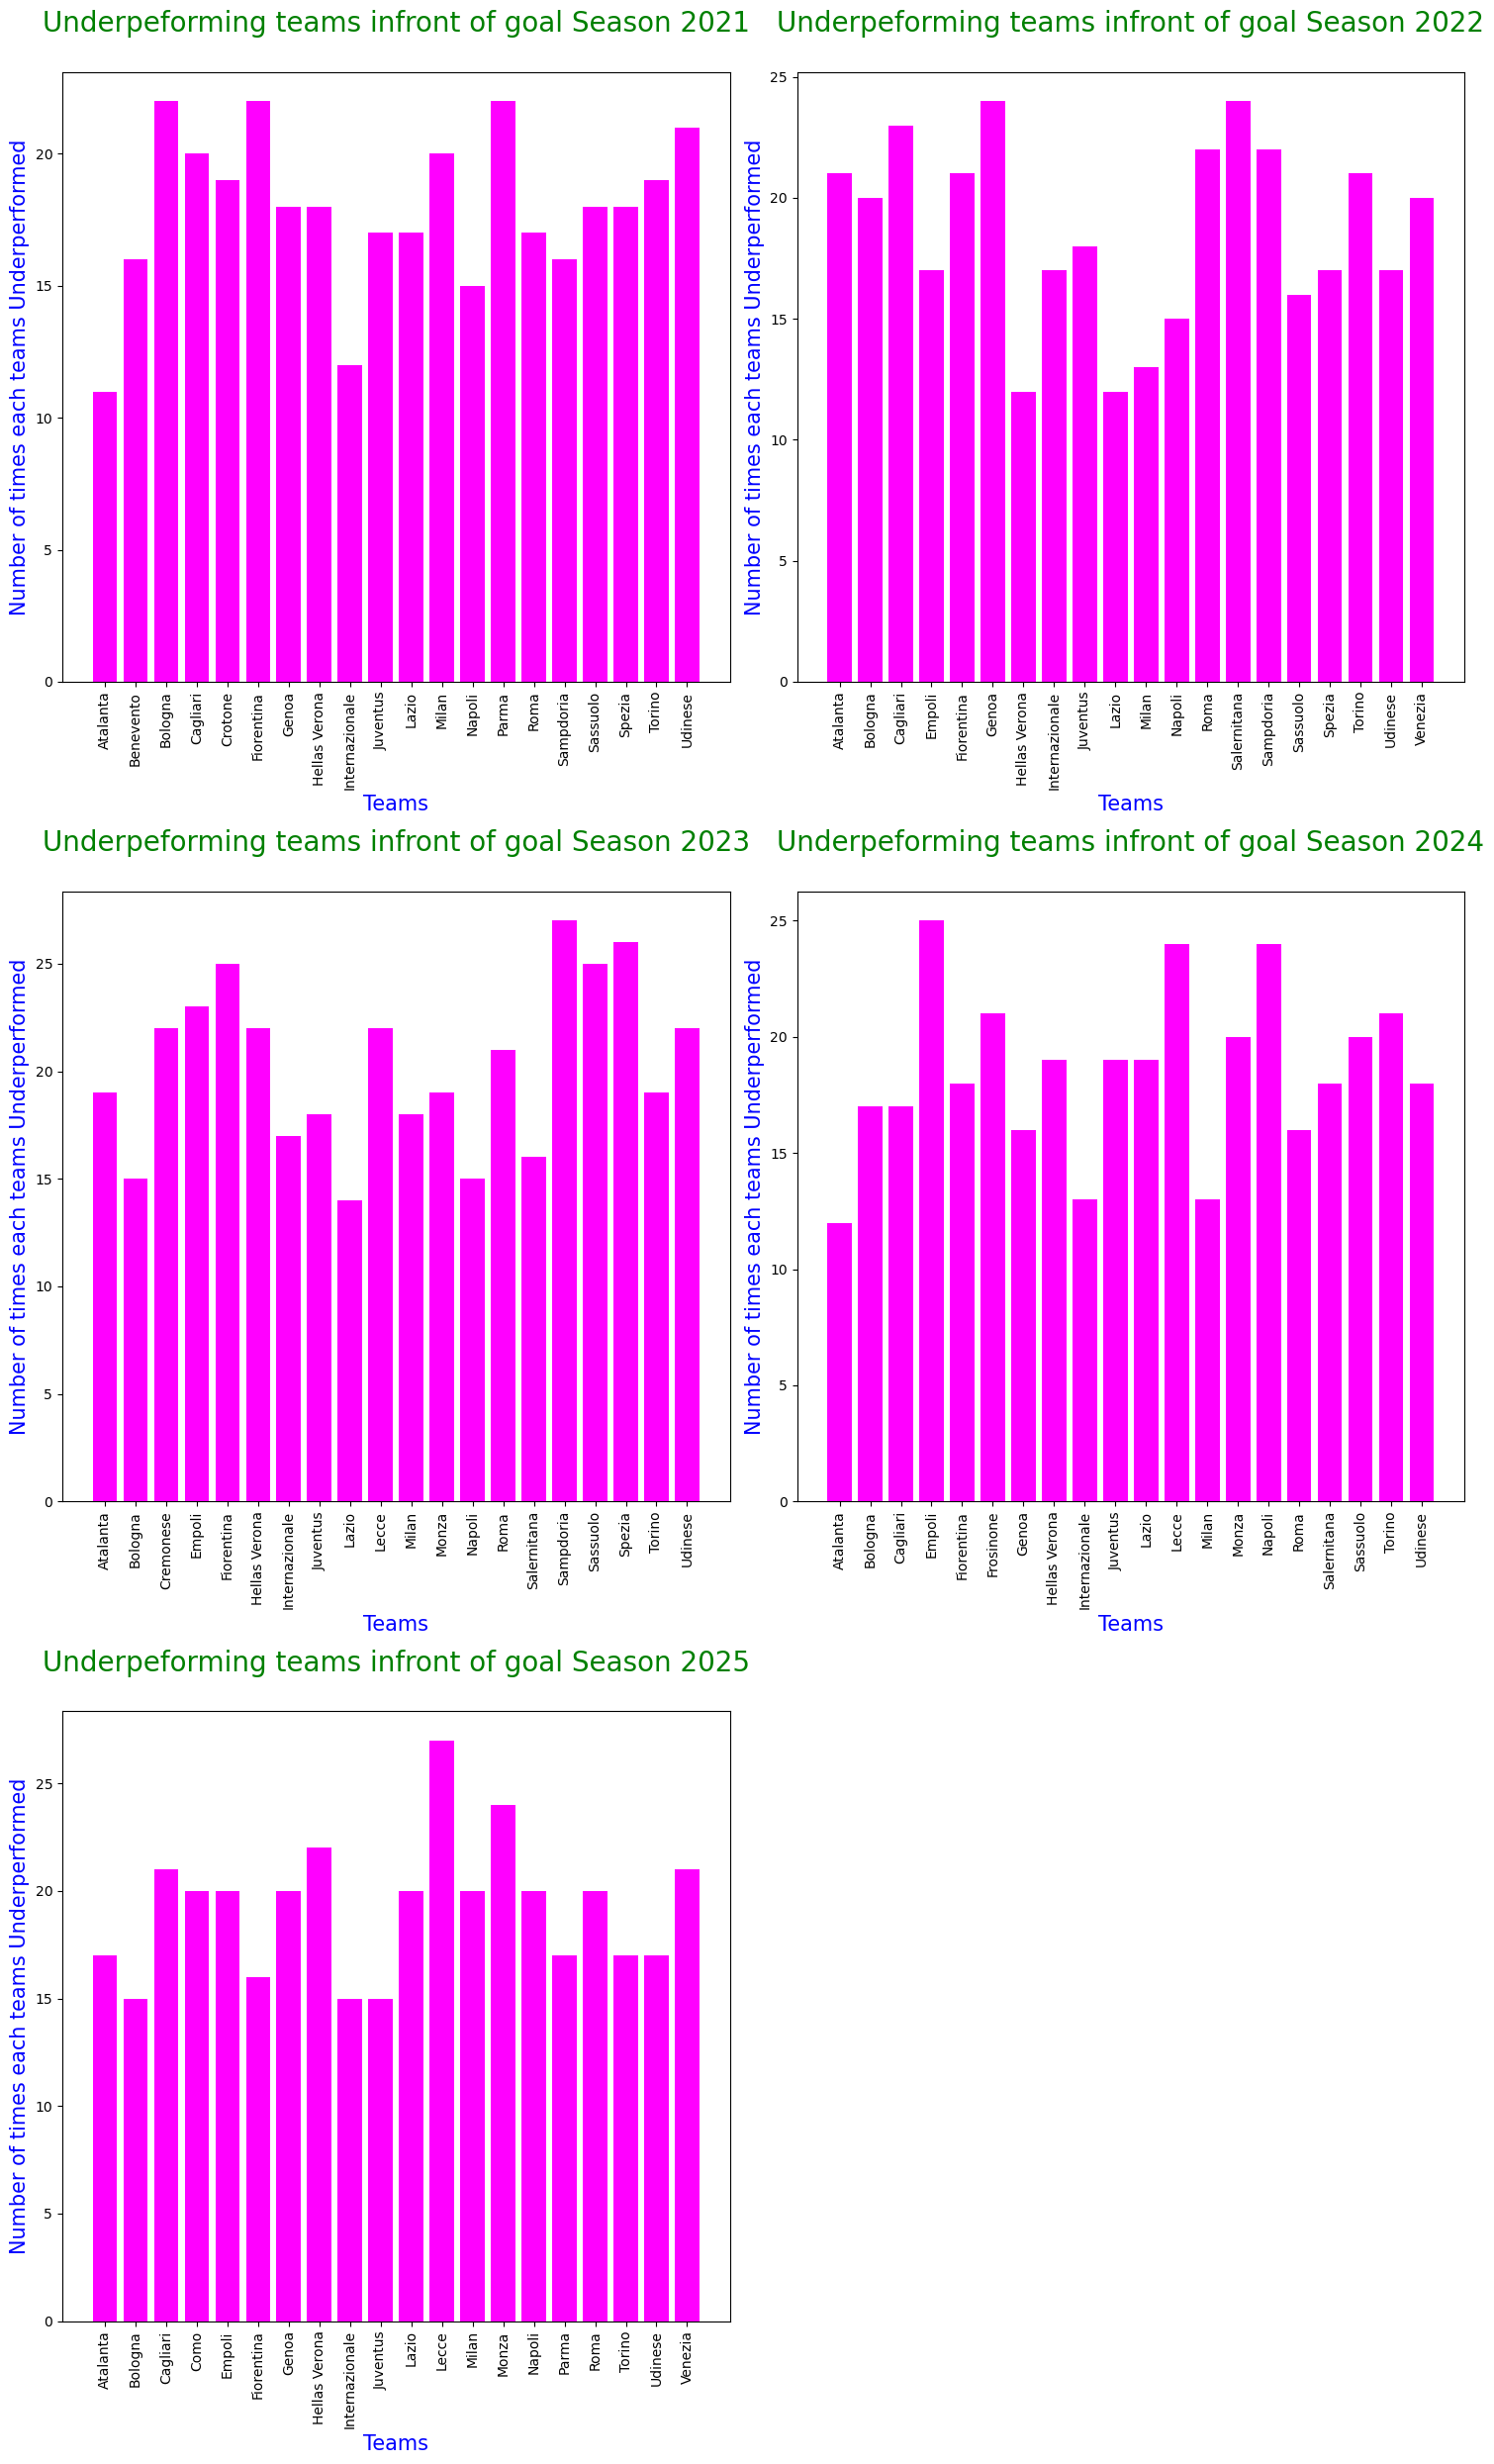

In [67]:
plt.figure(figsize = [15,25])

up_m1 = underperformed_metric_a[(underperformed_metric_a['Season'] == 2021)]
plt.subplot(3,2,1)

plt.bar(x = up_m1['Team'], height = up_m1['Performance_Infront_of_Goal'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Underpeforming teams infront of goal Season 2021\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each teams Underperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


up_m2 = underperformed_metric_a[(underperformed_metric_a['Season'] == 2022)]
plt.subplot(3,2,2)

plt.bar(x = up_m2['Team'], height = up_m2['Performance_Infront_of_Goal'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Underpeforming teams infront of goal Season 2022\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each teams Underperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


up_m3 = underperformed_metric_a[(underperformed_metric_a['Season'] == 2023)]
plt.subplot(3,2,3)

plt.bar(x = up_m3['Team'], height = up_m3['Performance_Infront_of_Goal'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Underpeforming teams infront of goal Season 2023\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each teams Underperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


up_m4 = underperformed_metric_a[(underperformed_metric_a['Season'] == 2024)]
plt.subplot(3,2,4)

plt.bar(x = up_m4['Team'], height = up_m4['Performance_Infront_of_Goal'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Underpeforming teams infront of goal Season 2024\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each teams Underperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


up_m5 = underperformed_metric_a[(underperformed_metric_a['Season'] == 2025)]
plt.subplot(3,2,5)

plt.bar(x = up_m5['Team'], height = up_m5['Performance_Infront_of_Goal'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Underpeforming teams infront of goal Season 2025\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each teams Underperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Here we checked based on the Goals Scored 'GF' and Expected Goals 'xG' How the teams Underperformed infront of the goal.

In [49]:
g = serieA_data[(serieA_data['Performance_Infront_of_Goal'] == 'Overperformed')]

g.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance,Performance_Infront_of_Goal
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2,-0.5,Overperformed
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5,-2.1,Overperformed
5,20:45,Serie A,Matchweek 6,Sun,Home,W,2,0,Monza,1.1,0.3,49.0,50000.0,Giovanni Di Lorenzo,4-3-3,3-4-3,Gianluca Manganiello,11.0,2.0,13.8,0.0,0,0,2025,Napoli,2024,9,29,18.2,18.2,-0.9,Overperformed
6,18:30,Serie A,Matchweek 7,Fri,Home,W,3,1,Como,1.9,0.4,41.0,50000.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Ermanno Feliciani,8.0,5.0,18.1,0.0,1,1,2025,Napoli,2024,10,4,37.5,62.5,-1.1,Overperformed
9,20:45,Serie A,Matchweek 10,Tue,Away,W,2,0,Milan,1.1,0.7,39.0,73507.0,Giovanni Di Lorenzo,4-3-3,4-3-3,Andrea Colombo,9.0,4.0,17.9,0.0,0,0,2025,Napoli,2024,10,29,22.2,44.4,-0.9,Overperformed


In [50]:
df7_sliced = g[['Season', 'Team', 'Performance_Infront_of_Goal']]

df7_sliced.head()

,Season,Team,Performance_Infront_of_Goal
1,2025,Napoli,Overperformed
3,2025,Napoli,Overperformed
5,2025,Napoli,Overperformed
6,2025,Napoli,Overperformed
9,2025,Napoli,Overperformed


In [51]:
overperformed_metric = df7_sliced.groupby(by = ['Season', 'Team']).count()

overperformed_metric_a = overperformed_metric.reset_index()

overperformed_metric_a

,Season,Team,Performance_Infront_of_Goal
0,2021,Atalanta,24
1,2021,Benevento,19
2,2021,Bologna,16
3,2021,Cagliari,17
4,2021,Crotone,18
5,2021,Fiorentina,16
6,2021,Genoa,18
7,2021,Hellas Verona,20
8,2021,Internazionale,25
9,2021,Juventus,19


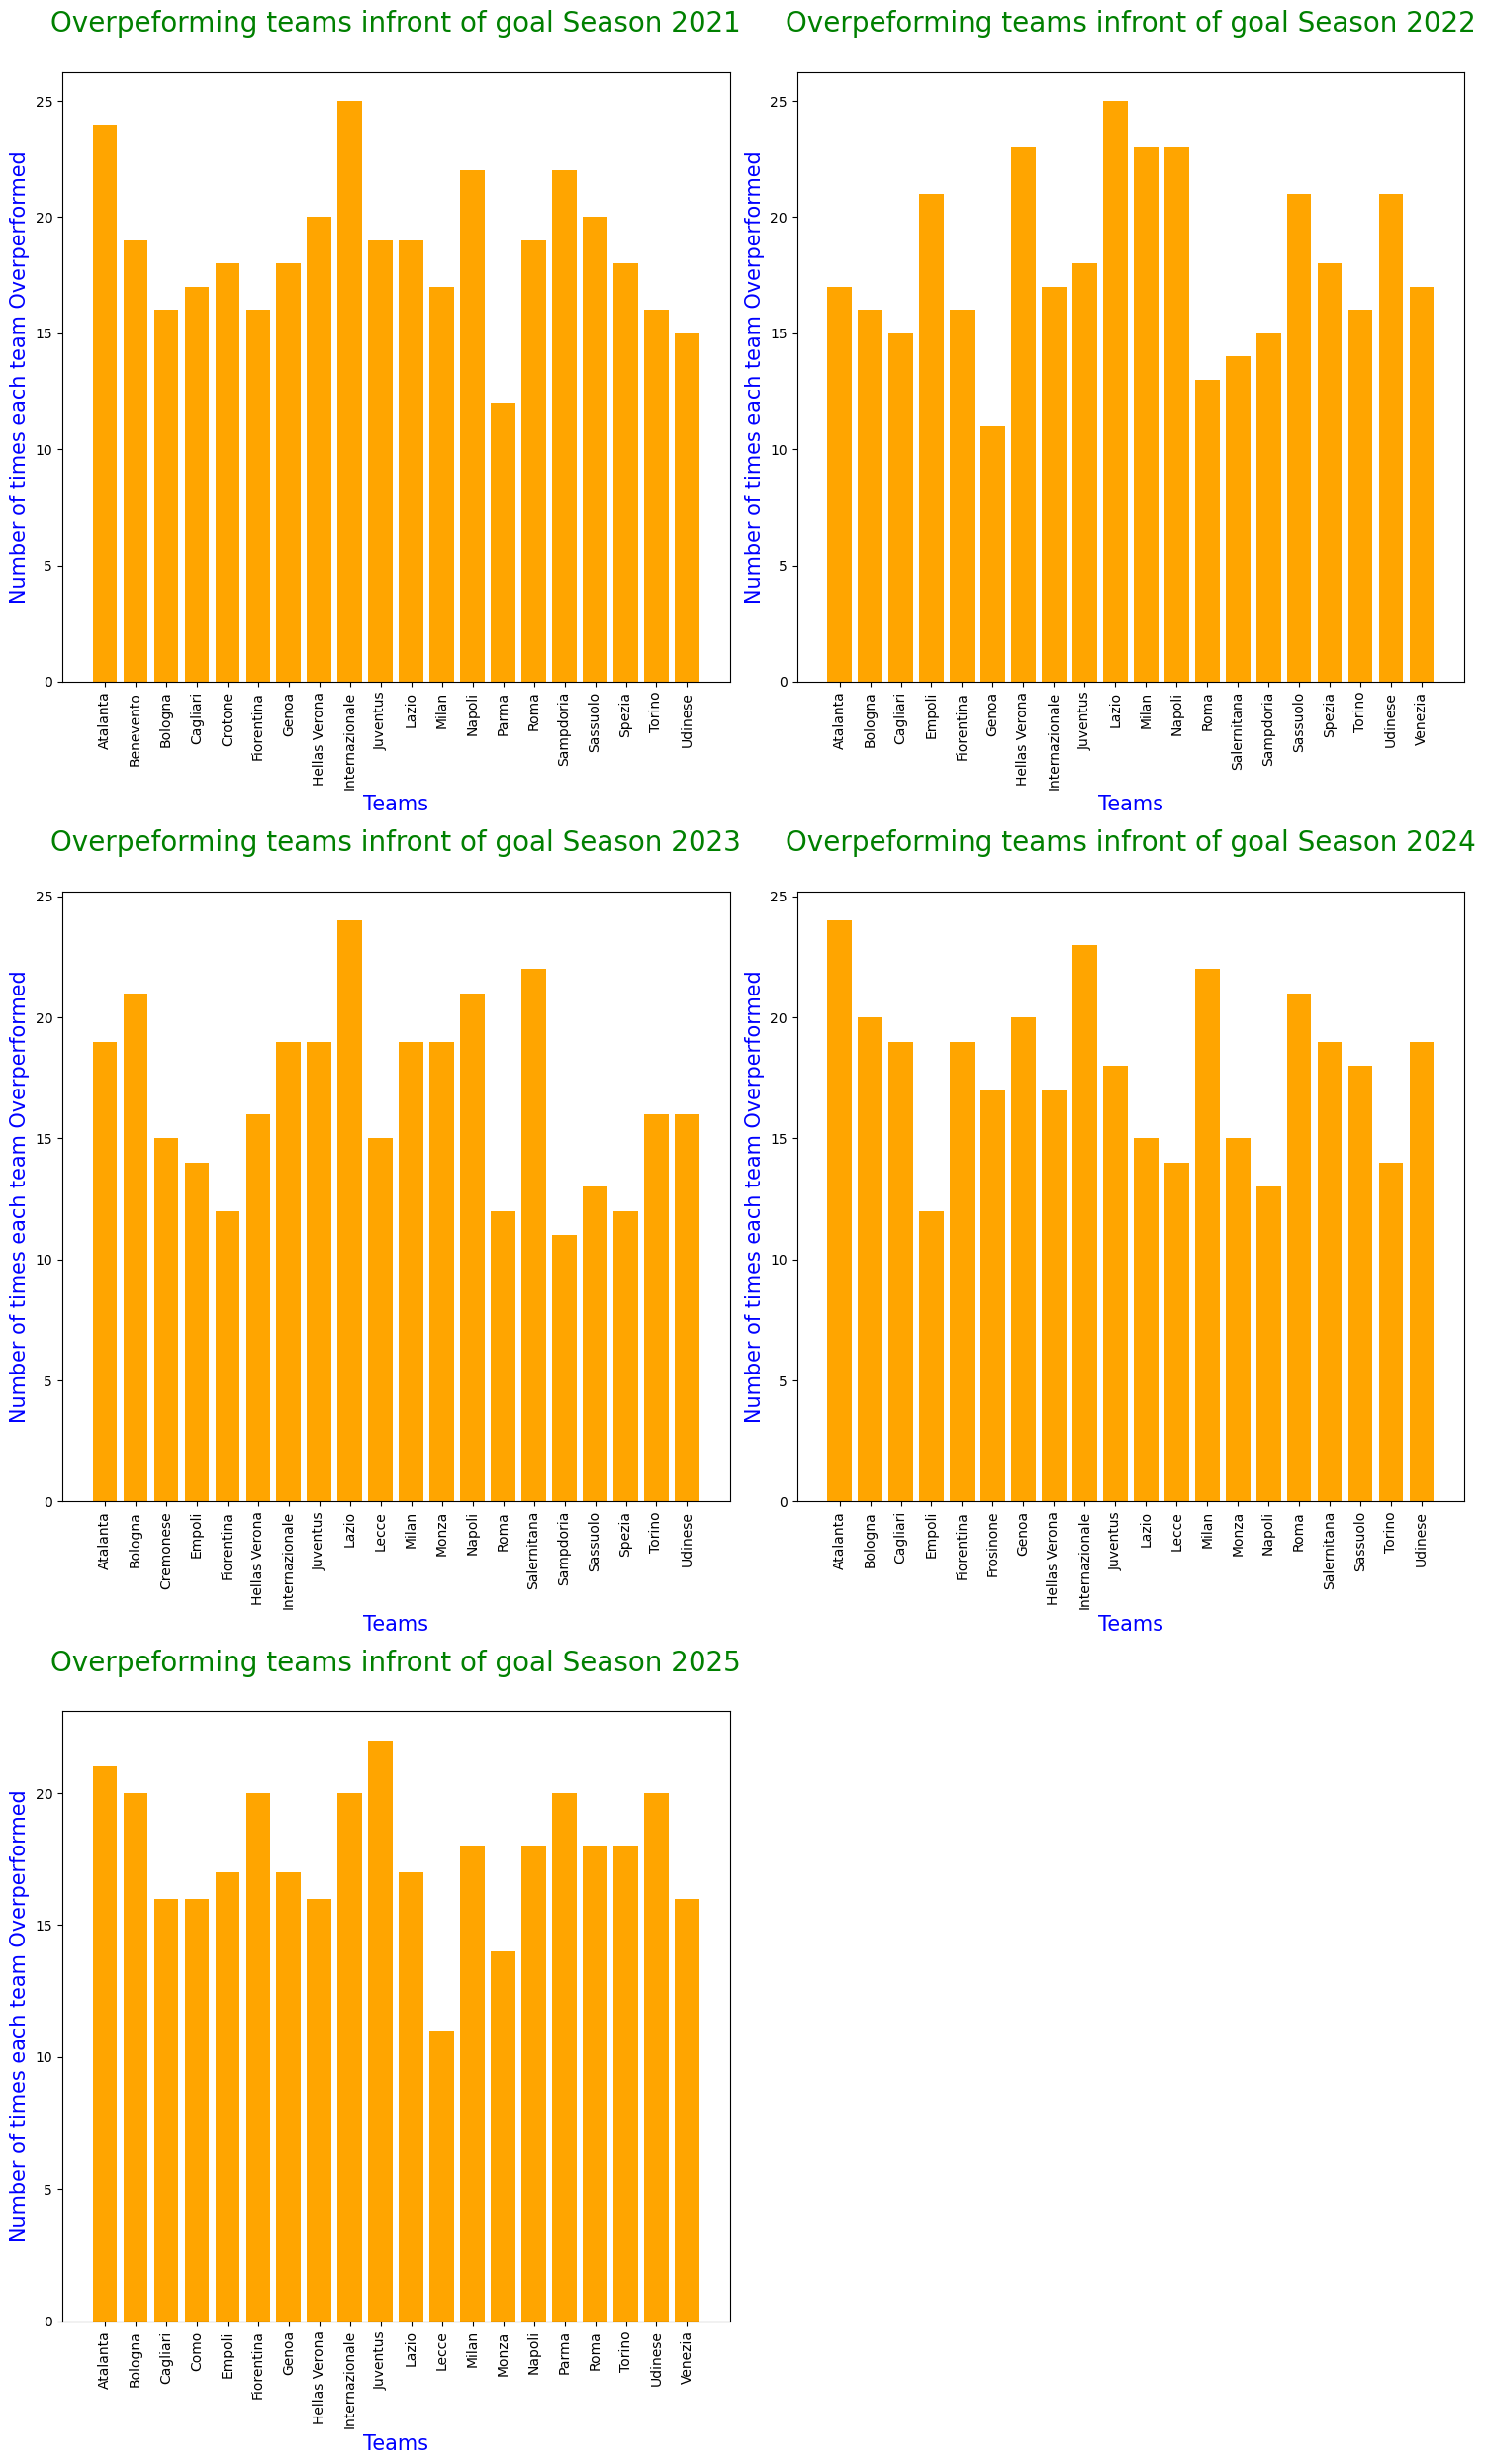

In [66]:
plt.figure(figsize = [15,25])

op_m1 = overperformed_metric_a[(overperformed_metric_a['Season'] == 2021)]
plt.subplot(3,2,1)

plt.bar(x = op_m1['Team'], height = op_m1['Performance_Infront_of_Goal'], align = 'center', color = 'orange')

## Adding Title: \n this is a break line. 
plt.title("Overpeforming teams infront of goal Season 2021\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each team Overperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


op_m2 = overperformed_metric_a[(overperformed_metric_a['Season'] == 2022)]
plt.subplot(3,2,2)

plt.bar(x = op_m2['Team'], height = op_m2['Performance_Infront_of_Goal'], align = 'center', color = 'orange')

## Adding Title: \n this is a break line. 
plt.title("Overpeforming teams infront of goal Season 2022\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each team Overperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


op_m3 = overperformed_metric_a[(overperformed_metric_a['Season'] == 2023)]
plt.subplot(3,2,3)

plt.bar(x = op_m3['Team'], height = op_m3['Performance_Infront_of_Goal'], align = 'center', color = 'orange')

## Adding Title: \n this is a break line. 
plt.title("Overpeforming teams infront of goal Season 2023\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each team Overperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


op_m4 = overperformed_metric_a[(overperformed_metric_a['Season'] == 2024)]
plt.subplot(3,2,4)

plt.bar(x = op_m4['Team'], height = op_m4['Performance_Infront_of_Goal'], align = 'center', color = 'orange')

## Adding Title: \n this is a break line. 
plt.title("Overpeforming teams infront of goal Season 2024\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each team Overperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


op_m5 = overperformed_metric_a[(overperformed_metric_a['Season'] == 2025)]
plt.subplot(3,2,5)

plt.bar(x = op_m5['Team'], height = op_m5['Performance_Infront_of_Goal'], align = 'center', color = 'orange')

## Adding Title: \n this is a break line. 
plt.title("Overpeforming teams infront of goal Season 2025\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Number of times each team Overperformed", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Here we checked based on the Goals Scored 'GF' and Expected Goals 'xG' How the teams Overperformed infront of the goal.

In [53]:
serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance,Performance_Infront_of_Goal
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6,1.0,Underperformed
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2,-0.5,Overperformed
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1,0.2,Underperformed
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5,-2.1,Overperformed
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5,0.3,Underperformed


In [54]:
print(serieA_data['Formation'].dtype)

object


### Now we will try and pick the best fromation that collected the most points each year irrespective of the team.


### We know that a Win = 3 points, Draw = 1 pont and Loss = 0 points

In [55]:
serieA_data['Points'] = serieA_data['Result'].map({'W': 3, 'L': 0, 'D': 1})

serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance,Performance_Infront_of_Goal,Points
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6,1.0,Underperformed,0
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2,-0.5,Overperformed,3
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1,0.2,Underperformed,3
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5,-2.1,Overperformed,3
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5,0.3,Underperformed,1


In [56]:
df8_sliced = serieA_data[['Season', 'Formation', 'Points']]

df8_sliced.head(20)

,Season,Formation,Points
0,2025,3-4-3,0
1,2025,3-4-3,3
2,2025,3-4-3,3
3,2025,3-4-3,3
4,2025,4-2-3-1,1
5,2025,4-3-3,3
6,2025,4-2-3-1,3
7,2025,4-3-3,3
8,2025,4-3-3,3
9,2025,4-3-3,3


In [57]:
best_formation = df8_sliced.groupby(by = ['Season', 'Formation']).sum()

best_formation_a = best_formation.reset_index()

best_formation_a.head(50)

,Season,Formation,Points
0,2021,3-1-4-2,7
1,2021,3-4-1-2,66
2,2021,3-4-3,138
3,2021,3-4-3◆,0
4,2021,3-5-1-1,20
5,2021,3-5-2,307
6,2021,4-1-2-1-2◆,2
7,2021,4-1-3-2,0
8,2021,4-1-4-1,11
9,2021,4-2-3-1,259


In [59]:
best_formation_a["Season"].value_counts()

Season
2024    18
2021    17
2022    17
2025    17
2023    16
Name: count, dtype: int64

In [58]:
best_formation_a.sort_values("Points", ascending = False).head(10)

,Season,Formation,Points
76,2025,4-2-3-1,343
5,2021,3-5-2,307
44,2023,4-3-3,278
9,2021,4-2-3-1,259
54,2024,3-5-2,245
25,2022,4-2-3-1,240
59,2024,4-2-3-1,238
36,2023,3-4-3,237
70,2025,3-4-3,221
28,2022,4-3-3,211


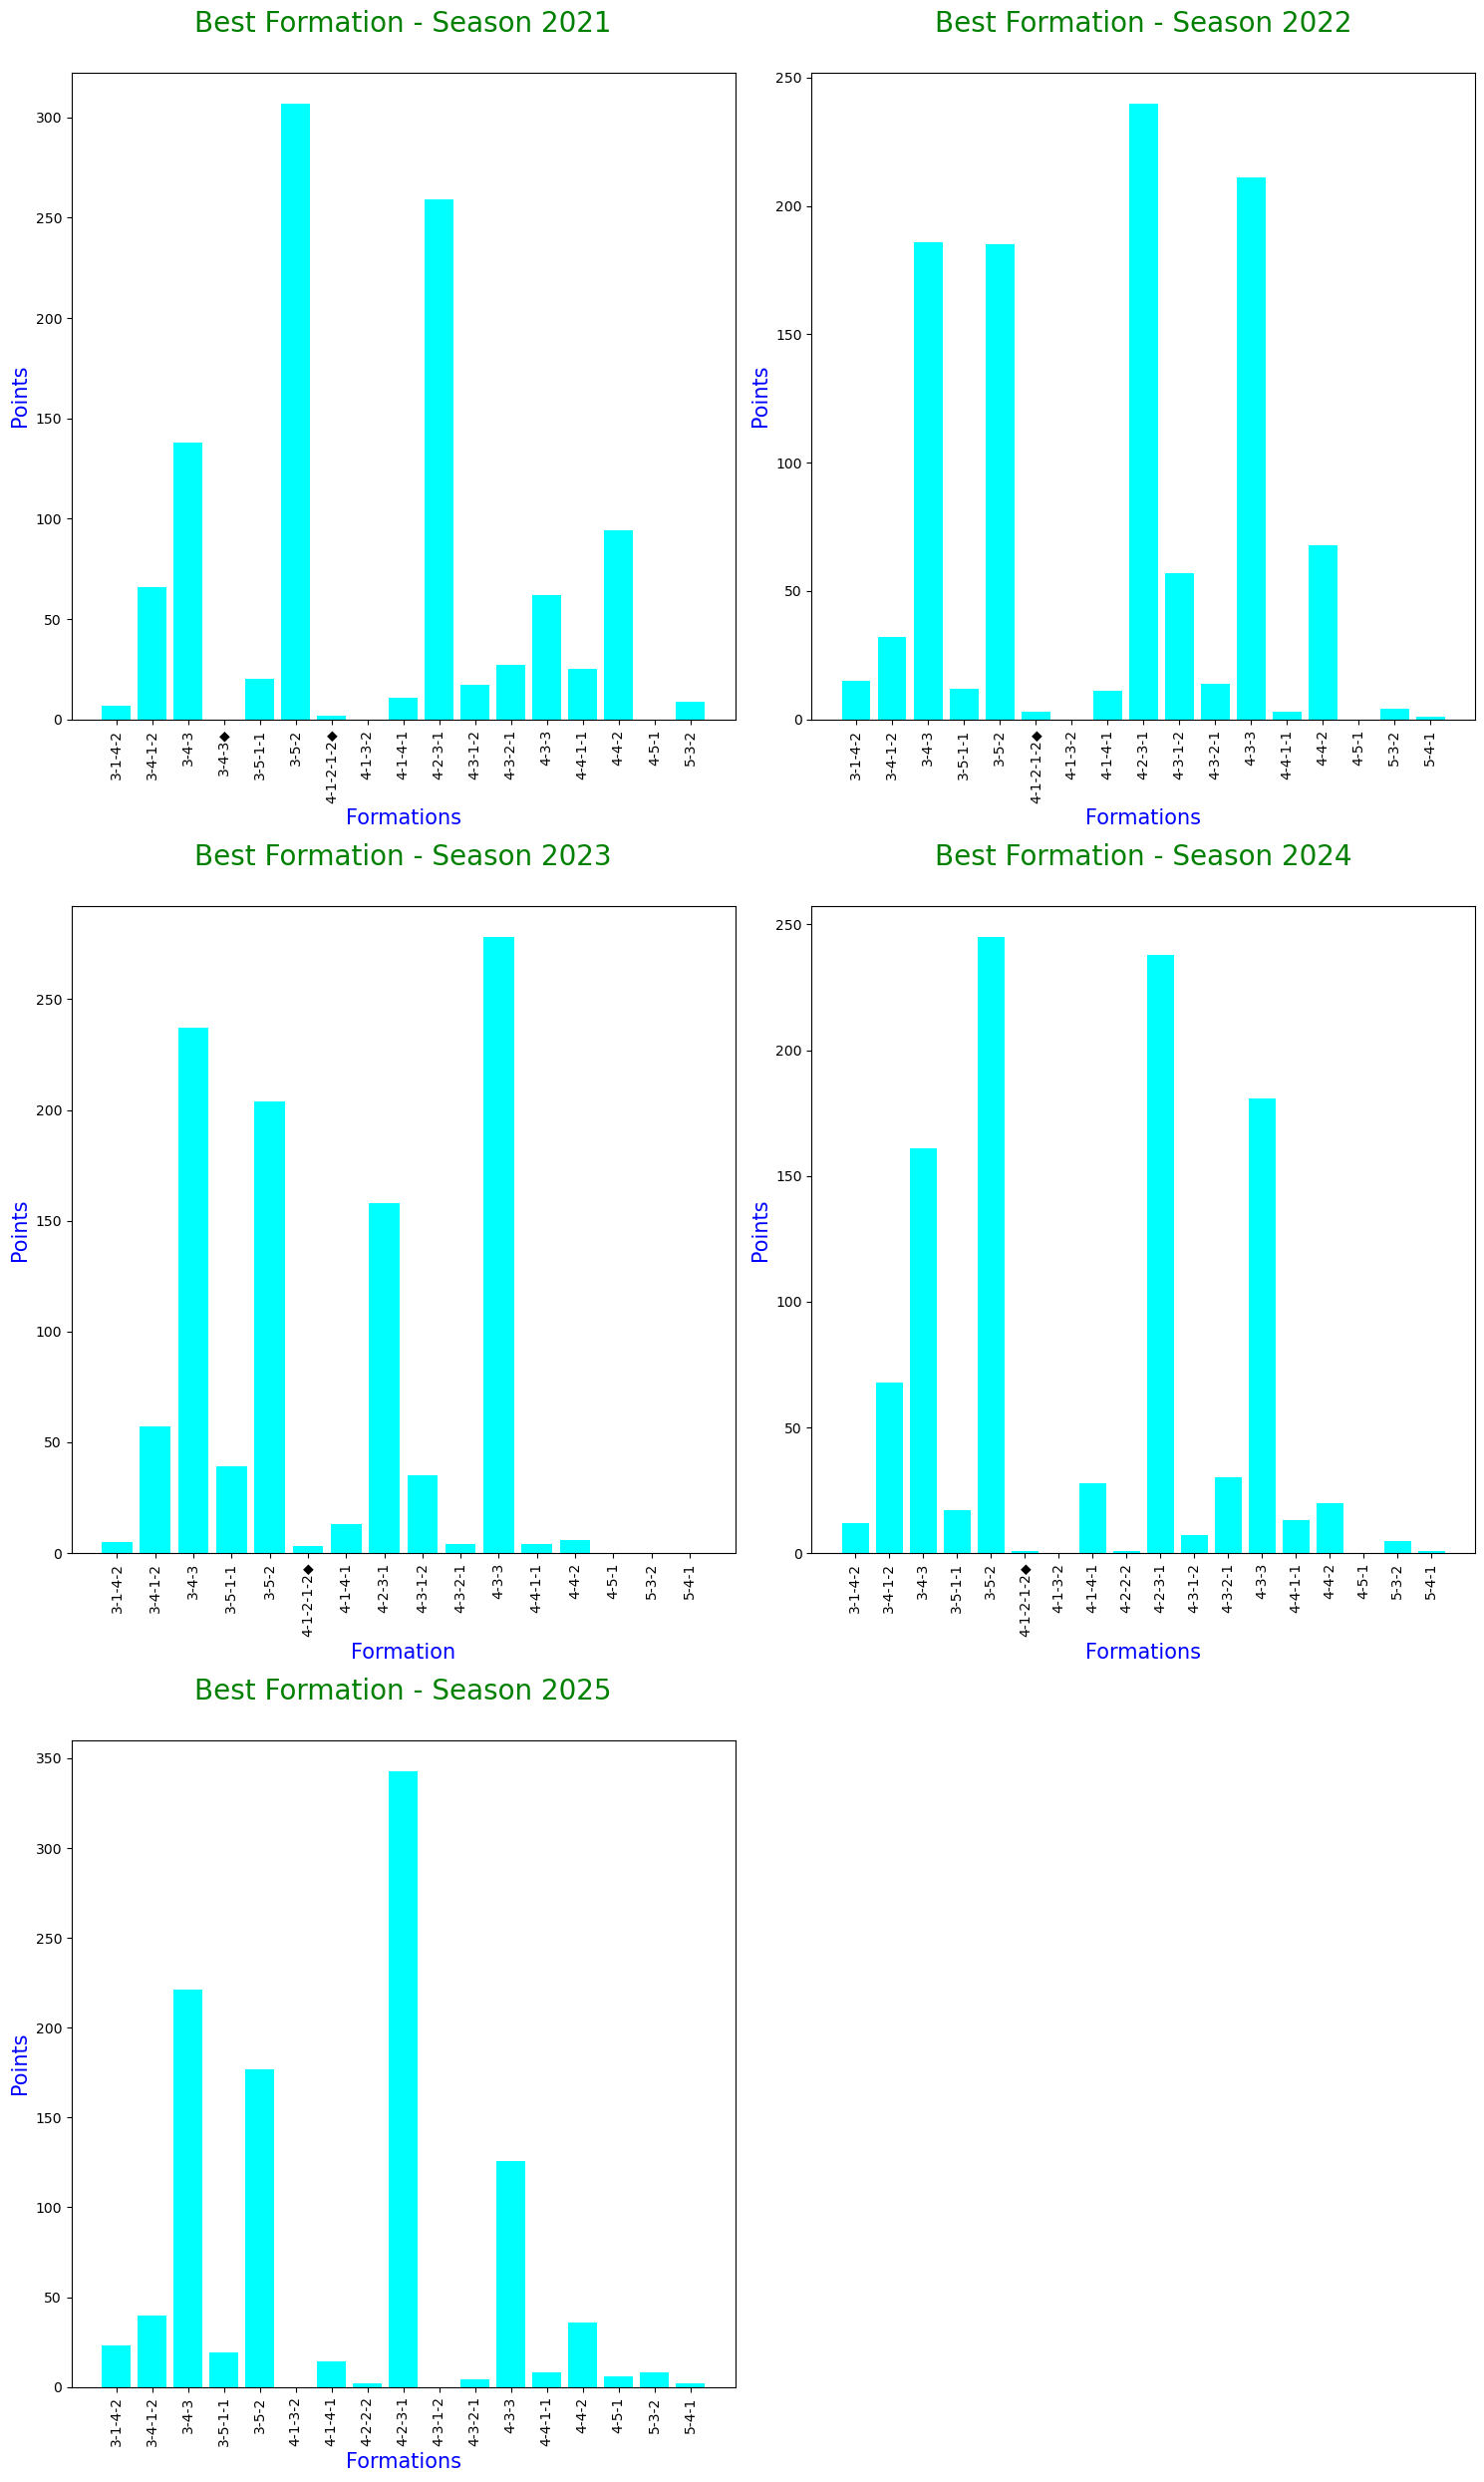

In [85]:
plt.figure(figsize = [15,25])

bf_1 = best_formation_a[(best_formation_a['Season'] == 2021)]
plt.subplot(3,2,1)

plt.bar(x = bf_1['Formation'], height = bf_1['Points'], align = 'center', color = 'cyan')

## Adding Title: \n this is a break line. 
plt.title("Best Formation - Season 2021\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Formations", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


bf_2 = best_formation_a[(best_formation_a['Season'] == 2022)]
plt.subplot(3,2,2)

plt.bar(x = bf_2['Formation'], height = bf_2['Points'], align = 'center', color = 'cyan')

## Adding Title: \n this is a break line. 
plt.title("Best Formation - Season 2022\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Formations", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


bf_3 = best_formation_a[(best_formation_a['Season'] == 2023)]
plt.subplot(3,2,3)

plt.bar(x = bf_3['Formation'], height = bf_3['Points'], align = 'center', color = 'cyan')

## Adding Title: \n this is a break line. 
plt.title("Best Formation - Season 2023\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Formation", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


bf_4 = best_formation_a[(best_formation_a['Season'] == 2024)]
plt.subplot(3,2,4)

plt.bar(x = bf_4['Formation'], height = bf_4['Points'], align = 'center', color = 'cyan')

## Adding Title: \n this is a break line. 
plt.title("Best Formation - Season 2024\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Formations", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


bf_5 = best_formation_a[(best_formation_a['Season'] == 2025)]
plt.subplot(3,2,5)

plt.bar(x = bf_5['Formation'], height = bf_5['Points'], align = 'center', color = 'cyan')

## Adding Title: \n this is a break line. 
plt.title("Best Formation - Season 2025\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Formations", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### We can see that 4-2-3-1 is formation that consistently performs well.

#### We can see that 3-5-2 formation performs well but has total points is decreasing season by season.

#### Another notable formation is 3-4-3 which is reliable and performs consistently well. 

#### We can see that 4-3-3 is also a recomended formation but its total points only reached peak in 2023

### Therefore, these are the best formations that works best irrespective of the team with the right players on the team. 


### Let us also check that cummulatively in 5 seasons which is the best formation with the most points accumulated across 5 seasons. 

In [70]:
df9_sliced = serieA_data[['Formation', 'Points']]

df9_sliced.head()

,Formation,Points
0,3-4-3,0
1,3-4-3,3
2,3-4-3,3
3,3-4-3,3
4,4-2-3-1,1


In [71]:
best_formation_with_most_points = df9_sliced.groupby(by = ['Formation']).sum()

best_formation_with_most_points_a = best_formation_with_most_points.reset_index()

best_formation_with_most_points_a.head()

,Formation,Points
0,3-1-4-2,62
1,3-4-1-2,263
2,3-4-3,943
3,3-4-3◆,0
4,3-5-1-1,107


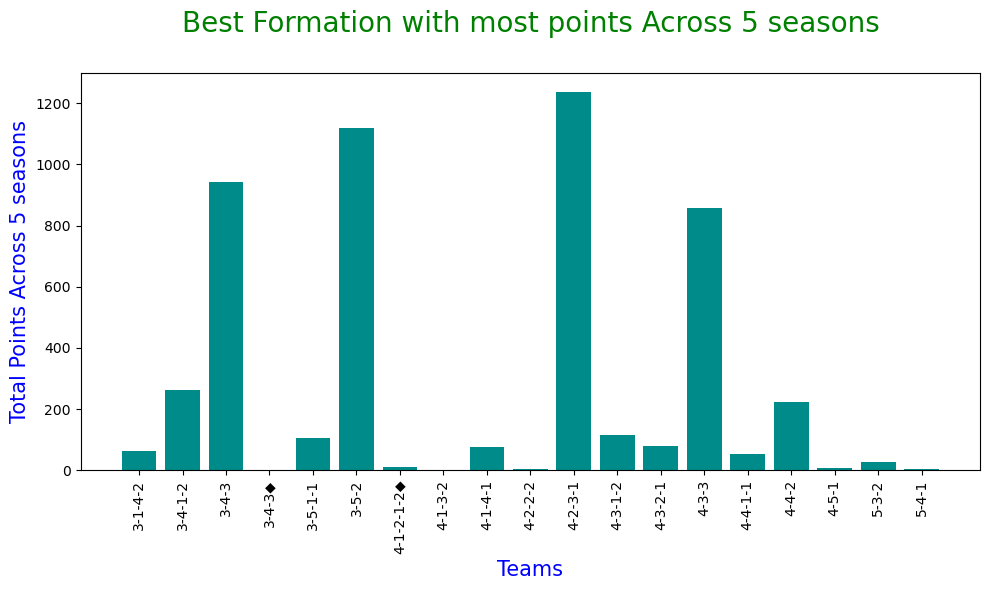

In [75]:
plt.figure(figsize = [10,6])

plt.bar(x = best_formation_with_most_points_a['Formation'], height = best_formation_with_most_points_a['Points'], align = 'center', color = 'darkcyan')

## Adding Title: \n this is a break line. 
plt.title("Best Formation with most points Across 5 seasons\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Total Points Across 5 seasons", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### We can see that 4-2-3-1 is the best formation in terms of results, also 3-5-2, 4-3-3 and 3-4-3 are also good formation that perform well in terms of results. 


### Also let's check which formation is used most by all the teams across 5 seasons

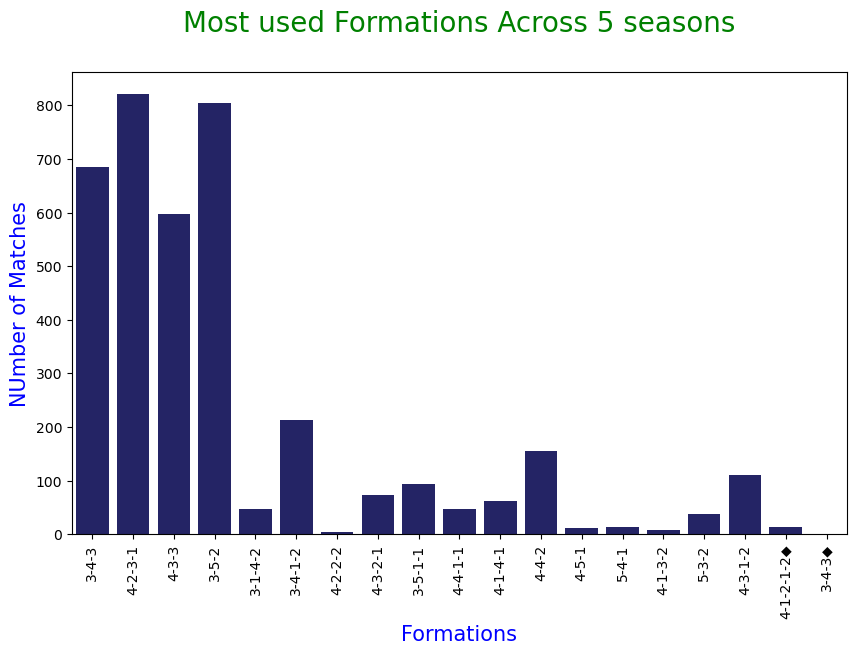

In [78]:
plt.figure(figsize = [10,6])

sns.countplot(x = serieA_data["Formation"], color = 'midnightblue')

plt.title("Most used Formations Across 5 seasons\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Formations", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("NUmber of Matches", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.show()

### Let us also check which teams have been great defensively as well, with lowest goals conceded and which teams have been defensively a disaster with highest goals conceded. 

In [79]:
serieA_data.head()

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,Year,Month,Day_of_month,Conversion_Rate,Shot_Accuracy_Rate,Performance,Performance_Infront_of_Goal,Points
0,18:30,Serie A,Matchweek 1,Sun,Away,L,0,3,Hellas Verona,1.0,1.7,67.0,20027.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Matteo Marchetti,14.0,4.0,17.8,0.0,0,0,2025,Napoli,2024,8,18,0.0,28.6,1.0,Underperformed,0
1,20:45,Serie A,Matchweek 2,Sun,Home,W,3,0,Bologna,2.5,0.6,39.0,45000.0,Giovanni Di Lorenzo,3-4-3,4-3-3,Luca Pairetto,16.0,5.0,17.5,0.0,0,0,2025,Napoli,2024,8,25,18.8,31.2,-0.5,Overperformed,3
2,20:45,Serie A,Matchweek 3,Sat,Home,W,2,1,Parma,2.2,1.7,55.0,50000.0,Giovanni Di Lorenzo,3-4-3,4-2-3-1,Paride Tremolada,29.0,7.0,17.5,1.0,0,0,2025,Napoli,2024,8,31,6.9,24.1,0.2,Underperformed,3
3,18:00,Serie A,Matchweek 4,Sun,Away,W,4,0,Cagliari,1.9,1.0,49.0,15733.0,Giovanni Di Lorenzo,3-4-3,3-4-3,Federico La Penna,13.0,5.0,16.0,0.0,0,0,2025,Napoli,2024,9,15,30.8,38.5,-2.1,Overperformed,3
4,18:00,Serie A,Matchweek 5,Sat,Away,D,0,0,Juventus,0.3,0.3,36.0,40295.0,Giovanni Di Lorenzo,4-2-3-1,4-2-3-1,Daniele Doveri,8.0,1.0,23.4,0.0,0,0,2025,Napoli,2024,9,21,0.0,12.5,0.3,Underperformed,1


In [80]:
df10_sliced = serieA_data[['Season','Team', 'GA']]

df10_sliced.head()

,Season,Team,GA
0,2025,Napoli,3
1,2025,Napoli,0
2,2025,Napoli,1
3,2025,Napoli,0
4,2025,Napoli,0


In [81]:
goals_conceded = df10_sliced.groupby(by = ['Season', 'Team']).sum()

goals_conceded_a = goals_conceded.reset_index()

goals_conceded_a

,Season,Team,GA
0,2021,Atalanta,47
1,2021,Benevento,75
2,2021,Bologna,65
3,2021,Cagliari,59
4,2021,Crotone,92
5,2021,Fiorentina,59
6,2021,Genoa,58
7,2021,Hellas Verona,48
8,2021,Internazionale,35
9,2021,Juventus,38


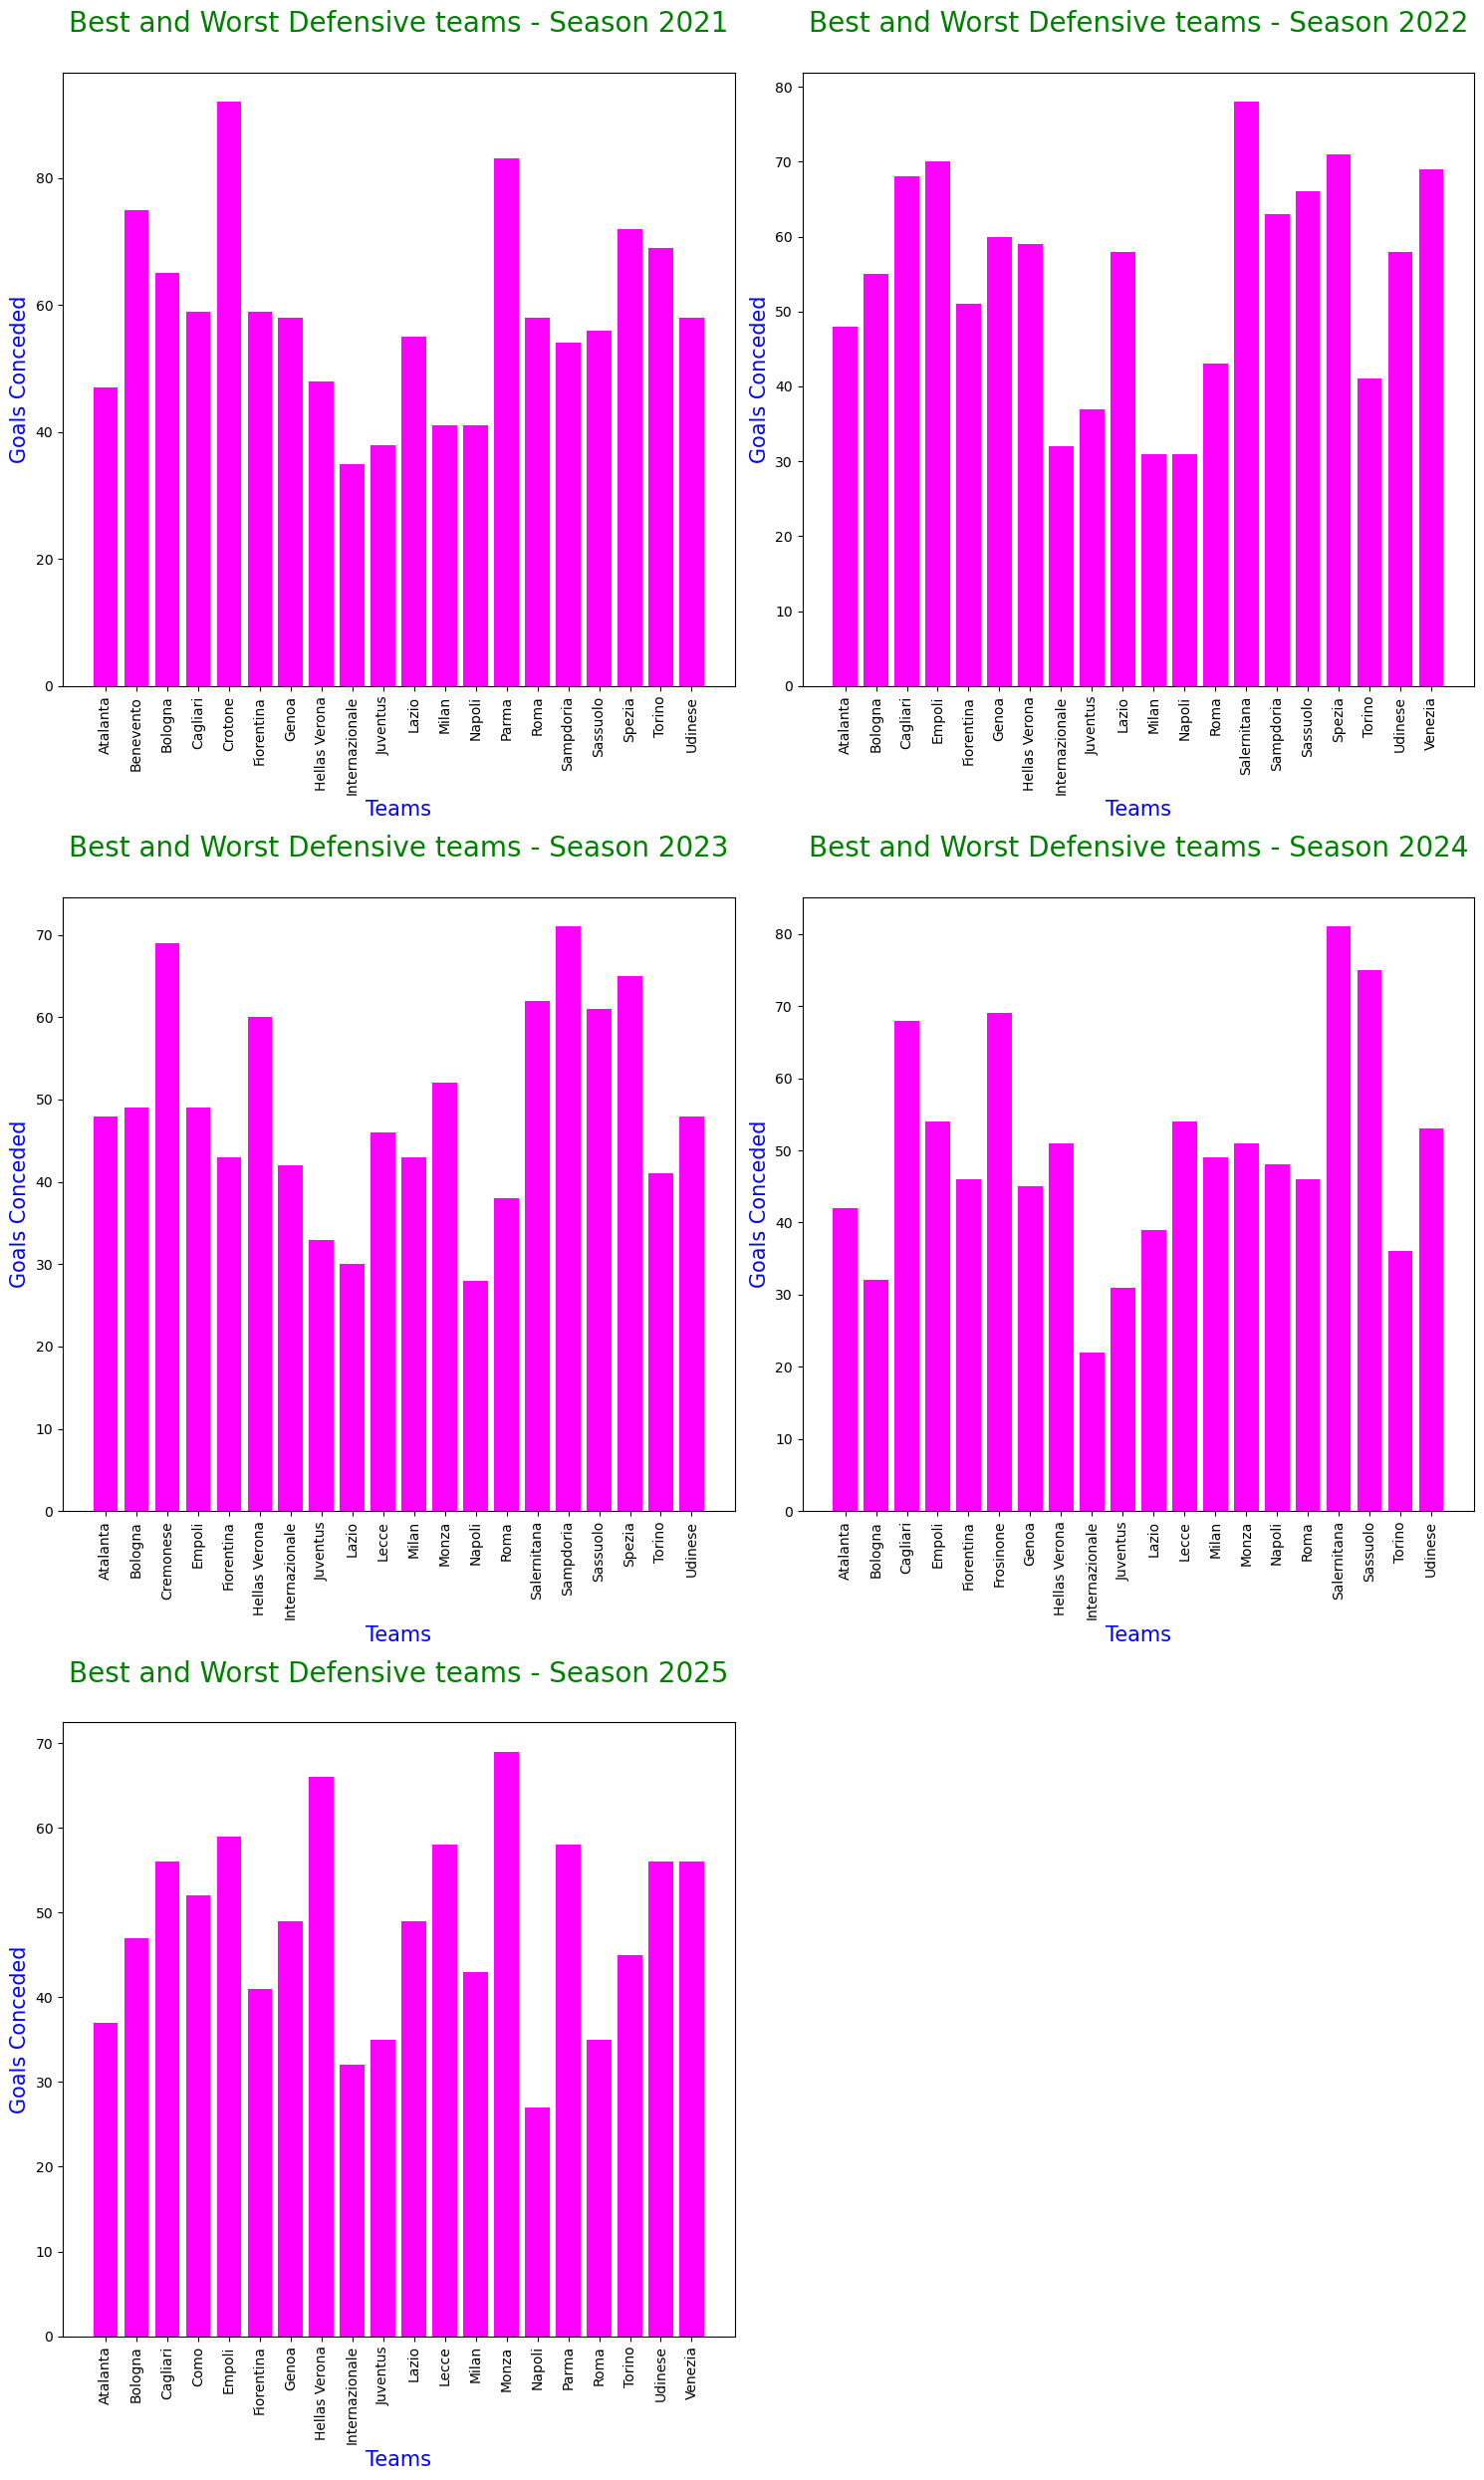

In [82]:
plt.figure(figsize = [15,25])

gc_1 = goals_conceded_a[(goals_conceded_a['Season'] == 2021)]
plt.subplot(3,2,1)

plt.bar(x = gc_1['Team'], height = gc_1['GA'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Best and Worst Defensive teams - Season 2021\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Goals Conceded", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


gc_2 = goals_conceded_a[(goals_conceded_a['Season'] == 2022)]
plt.subplot(3,2,2)

plt.bar(x = gc_2['Team'], height = gc_2['GA'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Best and Worst Defensive teams - Season 2022\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Goals Conceded", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


gc_3 = goals_conceded_a[(goals_conceded_a['Season'] == 2023)]
plt.subplot(3,2,3)

plt.bar(x = gc_3['Team'], height = gc_3['GA'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Best and Worst Defensive teams - Season 2023\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Goals Conceded", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


gc_4 = goals_conceded_a[(goals_conceded_a['Season'] == 2024)]
plt.subplot(3,2,4)

plt.bar(x = gc_4['Team'], height = gc_4['GA'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Best and Worst Defensive teams - Season 2024\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Goals Conceded", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


gc_5 = goals_conceded_a[(goals_conceded_a['Season'] == 2025)]
plt.subplot(3,2,5)

plt.bar(x = gc_5['Team'], height = gc_5['GA'], align = 'center', color = 'magenta')

## Adding Title: \n this is a break line. 
plt.title("Best and Worst Defensive teams - Season 2025\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Goals Conceded", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Here we can see that Napoli, Inter, Juve and Roma have the best Defensive record in Season 2025

### Here we can see that Inter, Juventus and Bologna have the best Defensive record in Season 2024

### Here we can see that Napoli, Lazio and Juve have the best Defensive record in Season 2023

### Here we can see that Inter, Juventus, Milan and Napoli have the best Defensive record in Season 2022

### Here we can see that Inter, Juventus, Milan and Napoli have the best Defensive record in Season 2021

## Now let us check for the League Winners of each: which is determined by the team who collected the most points at the end of the season after playing 38 games in a season. 

In [83]:
df11_sliced = serieA_data[['Season','Team', 'Points']]

df11_sliced.head()

,Season,Team,Points
0,2025,Napoli,0
1,2025,Napoli,3
2,2025,Napoli,3
3,2025,Napoli,3
4,2025,Napoli,1


In [84]:
league_winners = df11_sliced.groupby(by = ['Season', 'Team']).sum()

league_winners_a = league_winners.reset_index()

league_winners_a

,Season,Team,Points
0,2021,Atalanta,78
1,2021,Benevento,33
2,2021,Bologna,41
3,2021,Cagliari,37
4,2021,Crotone,23
5,2021,Fiorentina,40
6,2021,Genoa,42
7,2021,Hellas Verona,45
8,2021,Internazionale,91
9,2021,Juventus,78


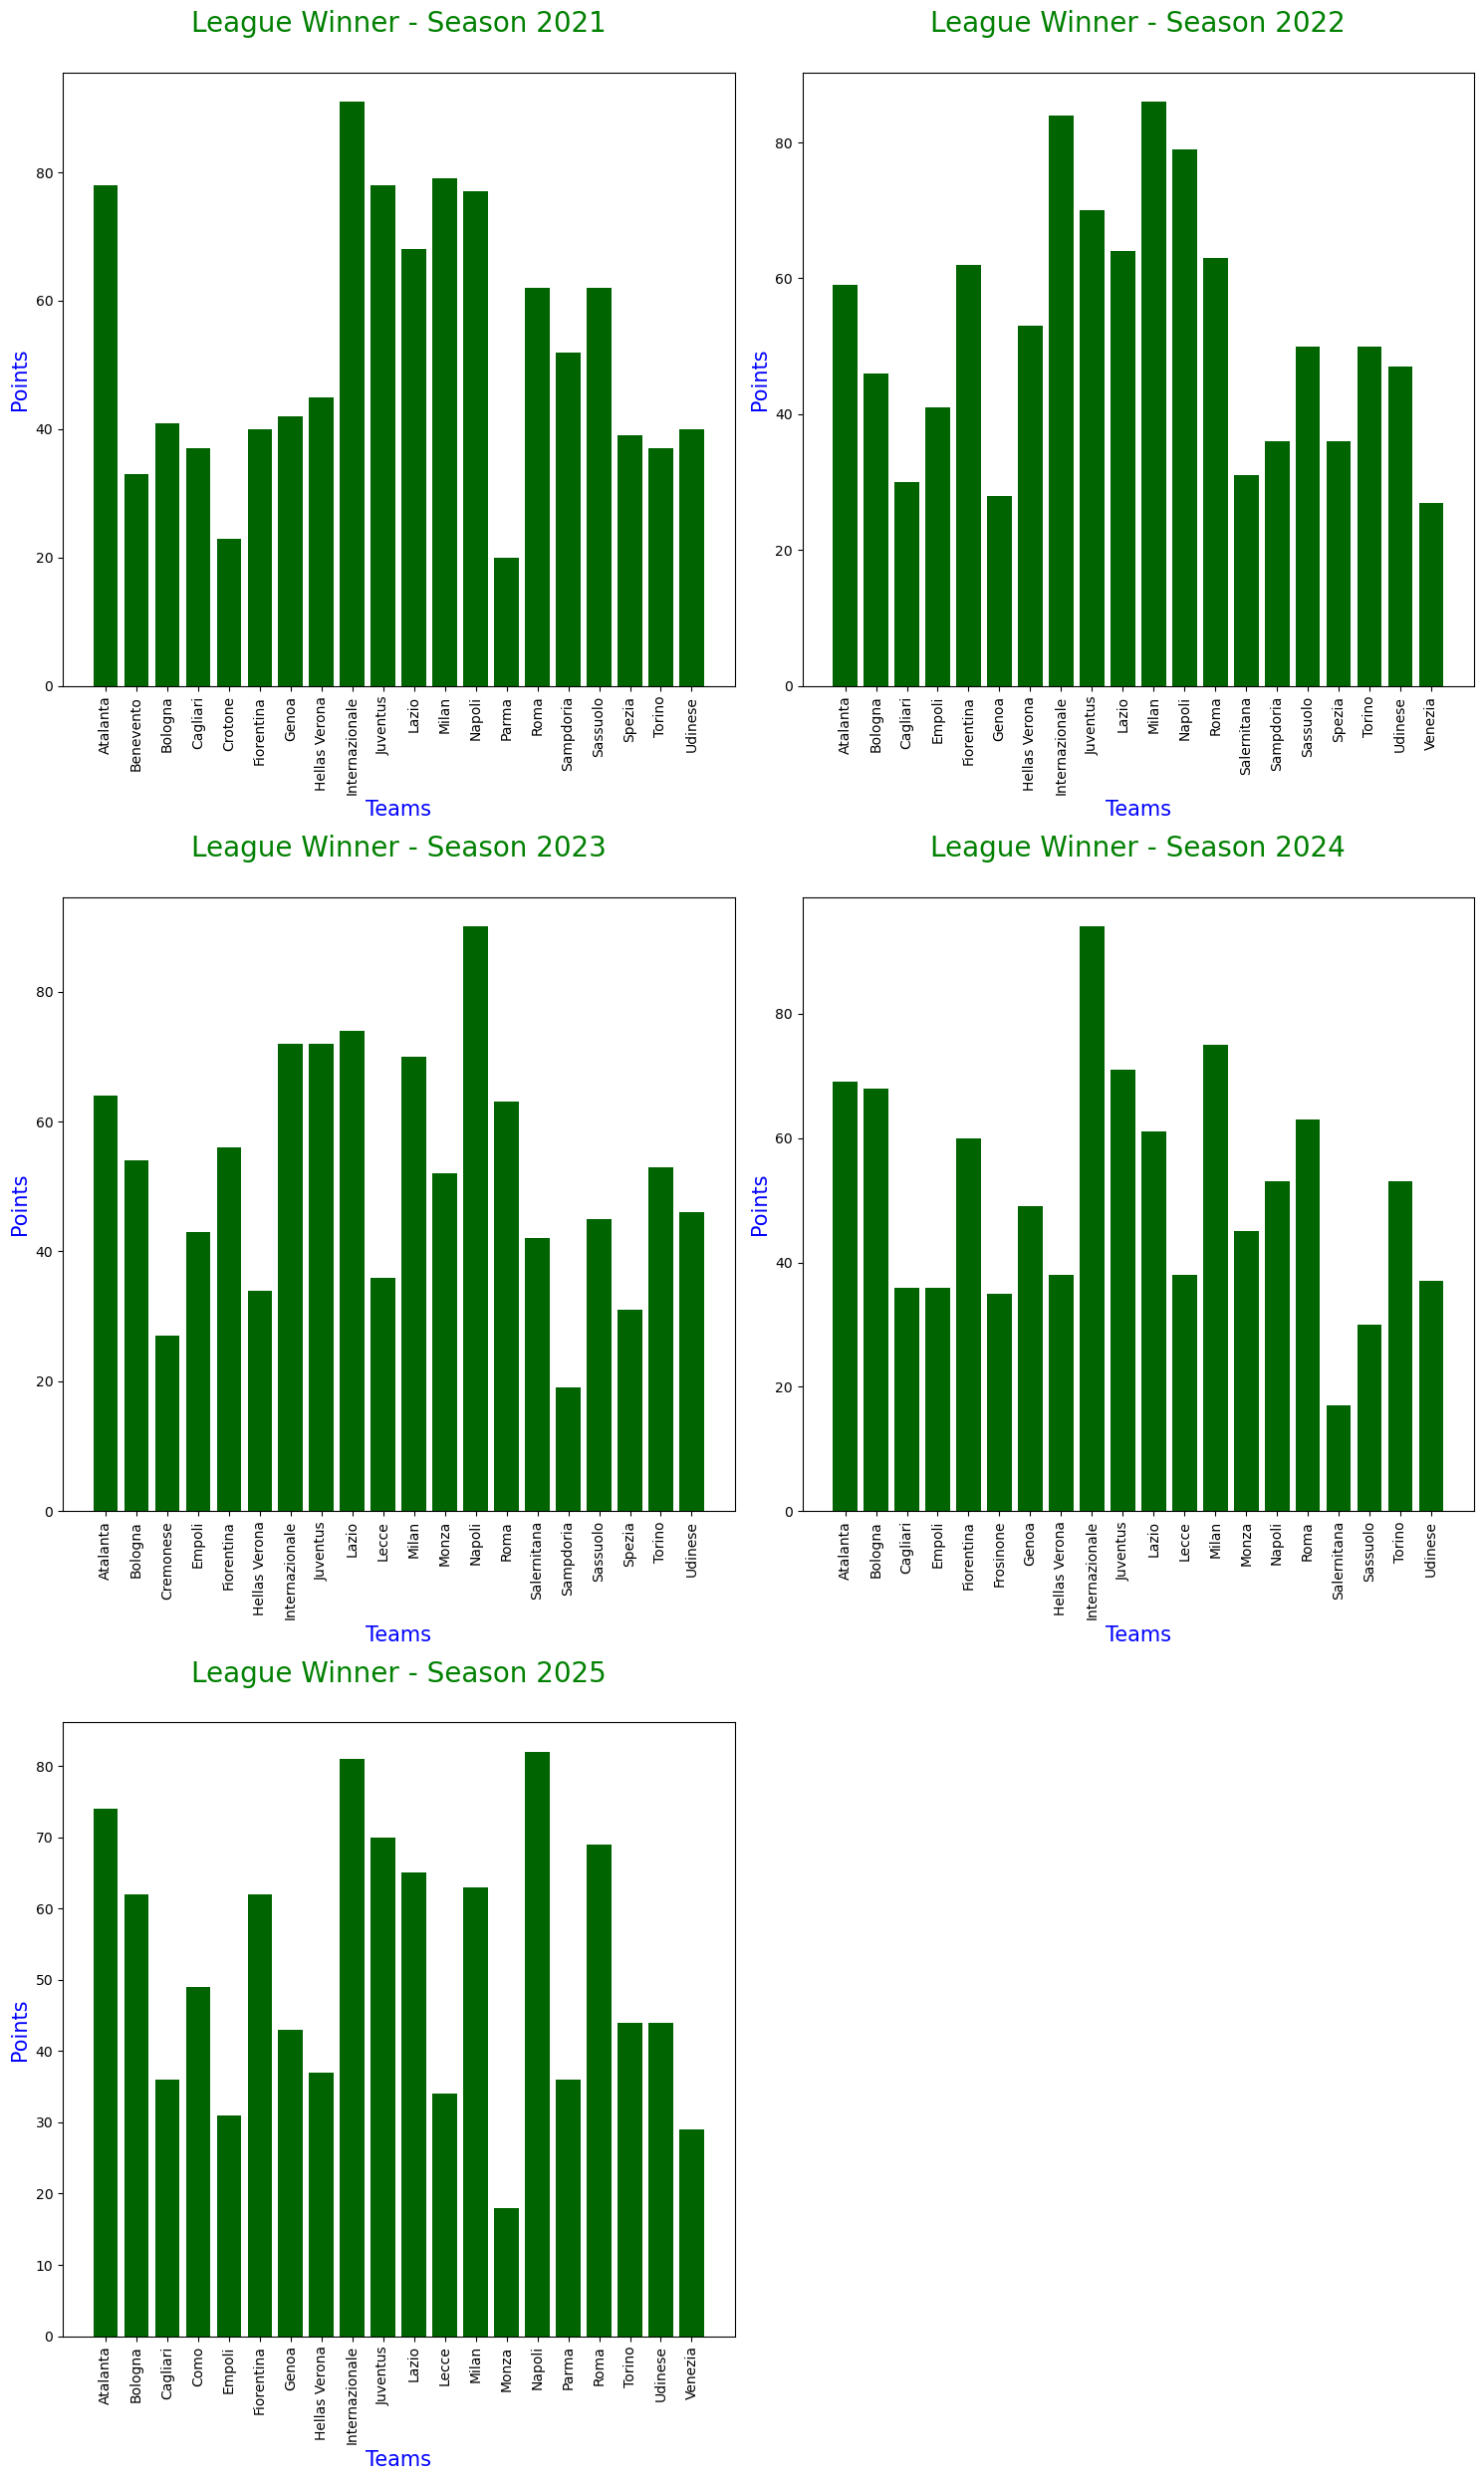

In [86]:
plt.figure(figsize = [15,25])

lg_1 = league_winners_a[(league_winners_a['Season'] == 2021)]
plt.subplot(3,2,1)

plt.bar(x = lg_1['Team'], height = lg_1['Points'], align = 'center', color = 'darkgreen')

## Adding Title: \n this is a break line. 
plt.title("League Winner - Season 2021\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


lg_2 = league_winners_a[(league_winners_a['Season'] == 2022)]
plt.subplot(3,2,2)

plt.bar(x = lg_2['Team'], height = lg_2['Points'], align = 'center', color = 'darkgreen')

## Adding Title: \n this is a break line. 
plt.title("League Winner - Season 2022\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


lg_3 = league_winners_a[(league_winners_a['Season'] == 2023)]
plt.subplot(3,2,3)

plt.bar(x = lg_3['Team'], height = lg_3['Points'], align = 'center', color = 'darkgreen')

## Adding Title: \n this is a break line. 
plt.title("League Winner - Season 2023\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


lg_4 = league_winners_a[(league_winners_a['Season'] == 2024)]
plt.subplot(3,2,4)

plt.bar(x = lg_4['Team'], height = lg_4['Points'], align = 'center', color = 'darkgreen')

## Adding Title: \n this is a break line. 
plt.title("League Winner - Season 2024\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)


lg_5 = league_winners_a[(league_winners_a['Season'] == 2025)]
plt.subplot(3,2,5)

plt.bar(x = lg_5['Team'], height = lg_5['Points'], align = 'center', color = 'darkgreen')

## Adding Title: \n this is a break line. 
plt.title("League Winner - Season 2025\n", fontdict = {'fontsize': 20, 'fontweight': 5, 'color': 'Green' })

## Adding Labels
plt.xlabel("Teams", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.ylabel("Points", fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

## Adding ticks: To Declutter the labels of the bars
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### The league was won by: Inter in 2021

### The league was won by: Milan in 2022

### The league was won by: Napoli in 2023

### The league was won by: Inter in 2024

### The league was won by: Napoli in 2025


## We can conclude that: 
**The 2026 season Contenders to win the league are Inter, Napoli and Milan**

**Other possible contenders are Juventus and Atalanta**

**Inter being the most likely contender to win the league this and Napoli coming in second**

**Based on all the stats and performance metrics Inter and Napoli are top two conterders to win league**